# 6 統計・確率

＜章トビラ＞

本章前半では、客観的にデータを分析し、データの傾向を明らかにする手法として、統計解析の基本について学びます。統計解析は「記述統計」と「推測統計」に大きく分かれますが、本講座ではこのうち「記述統計」と、「推測統計」の1つである回帰を主に取り上げます。
解説で使うデータとして、カリフォルニア大学の学生の属性データをダウンロードし、以前学んだPythonの色々なライブラリを使いながら学んでいきます。

ゴール：csvファイルのデータを読み込み、基礎的な統計量の算出と可視化、単回帰分析ができる

後半部分では、確率と統計を使った考え方と計算テクニックを身に付けていきましょう。確率と統計について、数式も含めて解説してきますので、数学的なバッググラウンドがない方にとっては難しいかもしれません。その場合は、それぞれの基本的な概念と計算方法の特徴をざっくりと把握しておくようにしてください。

世の中の様々な現象は確率的に生じていると仮定することで、それらの現象を数式的に表現することができます。具体的には、確率変数や確率分布、そして、確率論の3種の神器といわれる大数（たいすう）の法則と中心極限定理について学びます。ちなみに、3つ目は大偏差原理といって、確率的に起こりにくい非常にまれなケースを扱ったり、偏差が大きい部分の挙動を表すための原理ですが、本書の範囲を大きく超えるため、割愛します。他、統計的推定や検定についても学びます。

本講座で今後登場する機械学習は、これらの確率論や統計学の概念が基礎となって成り立っています。まだ確率統計の基礎を学んでいない方は、参考文献も使いながら、しっかりと学んでいきましょう。

ゴール：確率と統計の基礎的な理解と計算ができる

- **[6.1 統計解析の種類](#6.1-統計解析の種類)** 
    - [6.1.1 記述統計と推論統計](#6.1.1-記述統計と推論統計)
    - [6.1.2 この章で使うライブラリのインポート](#6.1.2-この章で使うライブラリのインポート)
<br><br>
- **[6.2 データの読み込みと対話](#6.2-データの読み込みと対話)**
    - [6.2.1 インターネットなどで配布されている対象データの読み込み](#6.2.1-インターネットなどで配布されている対象データの読み込み)
    - [6.2.2 データの読み込みと確認](#6.2.2-データの読み込みと確認)　
    - [6.2.3 データの性質を確認する](#6.2.3-データの性質を確認する)　
    - [6.2.4 量的データと質的データ](#6.2.4-量的データと質的データ)
<br><br>
- **[6.3 記述統計](#6.3-記述統計)**
    - [6.3.1 ヒストグラム](#6.3.1-ヒストグラム)
    - [6.3.2 平均、中央値、最頻値](#6.3.2-平均、中央値、最頻値)
    - [6.3.3 分散と標準偏差](#6.3.3-分散と標準偏差)
    - [6.3.4 要約統計量とパーセンタイル値](#6.3.4-要約統計量とパーセンタイル値)
    - [6.3.5 箱ひげ図](#6.3.5-箱ひげ図)
    - [6.3.6 変動係数](#6.3.6-変動係数)
    - [6.3.7 散布図と相関係数](#6.3.7-散布図と相関係数)
    - [6.3.8 すべての変数のヒストグラムゃ散布図を描く](#6.3.8-すべての変数のヒストグラムや散布図を描く)
<br><br>

- **[6.4 単回帰分析](#6.4-単回帰分析)**
    - [6.4.1 線形単回帰分析](#6.4.1-線形単回帰分析)
    - [6.4.2 決定係数](#6.4.2-決定係数)
<br><br>

- **[6.5 総合問題](#6.2-総合問題)**
    - [■総合問題6-1 統計の基礎と可視化](#■総合問題6-1-統計の基礎と可視化)
    - [■総合問題6-2 ローレンツ曲線とジニ係数](#■総合問題6-2-ローレンツ曲線とジニ係数)

- **[6.6 確率と統計を学ぶ準備](#6.6-確率と統計を学ぶ準備)** 
    - [6.6.1 この章の前提知識](#6.6.1-この章の前提知識)
    - [6.6.2 この章で使うライブラリのインポート](#6.6.2-この章で使うライブラリのインポート)
<br><br>
- **[6.7 確率](#6.7-確率)**
    - [6.7.1 数学的確率](#6.7.1-数学的確率)
    - [6.7.2 統計的確率](#6.7.2-統計的確率)
    - [6.7.3 条件付き確率と乗法定理](#6.7.3-条件付き確率と乗法定理)
    - [6.7.4 独立と従属](#6.7.4-独立と従属)
    - [6.7.5 ベイズの定理](#6.7.5-ベイズの定理)
<br><br>
- **[6.8 確率変数と確率分布](#6.8-確率変数と確率分布)**
    - [6.8.1 確率変数、確率関数、分布関数、期待値](#6.8.1-確率変数、確率関数、分布関数、期待値)
    - [6.8.2 さまざまな分布関数](#6.8.2-さまざまな分布関数)
    - [6.8.3 カーネル密度関数](#6.8.3-カーネル密度関数)
<br><br> 
- **[6.9 （応用）多次元確率分布](#6.9-（応用）多次元確率分布)**
    - [6.9.1 同時確率関数と周辺確率関数](#6.9.1-同時確率関数と周辺確率関数)
    - [6.9.2 条件付き確率関数と条件付き期待値](#6.9.2-条件付き確率関数と条件付き期待値)
    - [6.9.3 独立の定義と連続分布](#6.9.3-独立の定義と連続分布)
<br><br> 
- **[6.10 推計統計学](#6.10-推計統計学)**
    - [6.10.1 大数の法則](#6.10.1-大数の法則)
    - [6.10.2 中心極限定理](#6.10.2-中心極限定理)
    - [6.10.3 標本分布](#6.10.3-標本分布)
<br><br> 
- **[6.11 統計的推定](#6.11-統計的推定)**
    - [6.11.1 推定量と点推定](#6.11.1-推定量と点推定)
    - [6.11.2 不偏性と一致性](#6.11.2-不偏性と一致性)
    - [6.11.3 区間推定](#6.11.3-区間推定)
    - [6.11.4 推定量を求める](#6.11.4-推定量を求める)
<br><br> 
- **[6.12 統計的検定](#6.12-統計的検定)**
    - [6.12.1 検定](#6.12.1-検定)
    - [6.12.2 第1種の過誤と第2種の過誤](#6.12.2-第1種の過誤と第2種の過誤)
    - [6.12.3 ビッグデータに対する検定の注意](#6.12.3-ビッグデータに対する検定の注意)
<br><br>
- **[6.13 総合問題](#6.13-総合問題)**
    - [■総合問題6-3 検定](#■総合問題6-3-検定)

***

## 6.1 統計解析の種類

キーワード：記述統計、推論統計、平均、標準偏差、単回帰分析、Numpy、Scipy、Pandas、Matplotlib、Scikit-learn

本講座ではPythonといくつかのライブラリについて、基本的な使い方を説明してきました。この章からは、それらを活用して、実際のデータと対話していきます。

### 6.1.1 記述統計と推論統計
統計解析は、データを客観的に分析し、そのデータに含まれる傾向を明らかにする方法です。その手法は、「記述統計」と「推測統計」に大きく分かれます。


**記述統計** 

記述統計は、集めたデータの特徴をつかんだり分かりやすく整理したり見やすくしたりする方法です。たとえば、平均や標準偏差などを計算してデータの特徴を計算したり、データを分類したり、図やグラフなどを用いて表現したりするのが記述統計です。この章で詳しく扱います。

**推論統計**

集めたデータから推論する方法です。たとえば、日本の全人口の年齢別の身長を調べたいとします。全員の身長を調べるのは困難です。そこでランダムに抽出した一部の人たちだけを対象に身長を調べ、そこから母集団である日本人の身長を推論します。このように、部分的なデータしかないものから確率分布に基づいたモデルを用いて精密な解析をし、全体を推論して統計を求めるのが、推論統計の考え方です。
推論統計は過去のデータから未来予測するときにも使われます。この章では、推論統計の基礎である単回帰分析について説明します。より複雑な推論統計については、次の章で扱います。

### 6.1.2 この章で使うライブラリのインポート

この章では、以前紹介した各種ライブラリを使います。次のようにインポートしていることを前提として進めていきます。

In [1]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

# 小数第3位まで表示
%precision 3

'%.3f'

また、「6.4　単回帰分析」では、Scikit-learnの線形回帰分析用のライブラリである`sklearn.linear_model`を使います。scikit-learnは、機械学習の基本的なライブラリです。「3.4」でも改めて説明しますが、次のようにインポートします。

In [0]:
from sklearn import linear_model

## 6.2 データの読み込みと対話
キーワード：ディレクトリ（フォルダ）操作、CSV、量的データ、質的データ、平均

データを解析するには、対象のデータをPythonで扱えるように読み込む必要があります。
データはCSV形式データやデータベースとして扱うのが一般的です。またインターネットには、研究用のデータが圧縮されたZIP形式で提供されているものもあります。
まずは、こうしたデータを読み込む方法から習得しましょう。

### 6.2.1 インターネットなどで配布されている対象データの読み込み

ここでは対象のデータが、ZIP形式ファイルとしてWebで公開されており、それをダウンロードして利用するという状況を想定します。ブラウザからあらかじめダウンロードしておくこともできますが、Pythonでは、直接読み込んでデータを保存することもできるため、本書では、Pythonのプログラムでダウンロードする方法を説明します。

#### カレントディレクトリの確認

まずは、ダウンロードするファイルを置くディレクトリ（フォルダ）を準備します。Jupyter環境で「`pwd`」と入力して実行すると、現在、どこのディレクトリが操作対象になっているのかを確認できます。操作対象となっているディレクトリのことをカレントディレクトリと言います（Jupyter環境ではなく、コマンドプロンプトやシェルなどでも、同じように操作対象のディレクトリをカレントディレクトリと言います）。

なお、表示されるディレクトリの名前は、環境によって異なります。すなわち、実行例は、ここで提示しているものと違うかも知れませんが、結果が表示されていれば問題ありません。

なお、「`pwd`」はPythonのプログラムではなく、シェルのコマンドです。Jupyter環境では、ひとつのセルに「`pwd`などのシェルのコマンド」と「Pythonのコマンド」を混ぜて書くことはできず、エラーとなるので注意してください。

In [3]:
pwd

'/content'

#### ディレクトリの作成と移動

確認したら、ここにダウンロードするディレクトリを作りましょう。Jupyter環境のセルに次のように入力して実行すると、上記で確認したディレクトリの下にchap6という名前のフォルダが作られます。


In [0]:
mkdir chap6

ディレクトリを作成したら、そこに移動しましょう。セルに次のように`cd`コマンドを入力して実行することで、いま作成したchap6ディレクトリに移動できます。


In [5]:
cd ./chap6

/content/chap6


#### サンプルデータのダウンード

次に、このディレクトリにサンプルデータをダウンロードします。ここでは、カリフォルニア大学アーバイン校（UCI）が提供しているサンプルデータを利用します。
ここではファイルをPythonのプログラムでダウンロードすることにします。下記に示すコードを順にJupyter環境のセルに入力して順に実行すると、いま作成したchap6ディレクトリにダウンロードしたデータが保存されます。


#### ZIPファイルとファイルをダウンロードするためのライブラリ

まずは、ZIPファイルやファイルをダウンロードするためのライブラリをインポートします。ZIPファイルを読み込んだり、Webから直接ダウンロードしたりするには、次のように「`requests`」「`zipfile`」「`io`」の3つのライブラリを使います。

- `requests` … Webのデータを送受信します
- `zipfile` … ZIP形式ファイルを読み書きします
- `io` … ファイルを読み書きします

In [0]:
# webからデータを取得したり、zipファイルを扱うためのライブラリ
import requests, zipfile
from io import StringIO
import io

#### ZIPファイルをダウンロードして展開する

ここで利用するファイルは、次のファイルです。ZIP形式でまとめられています。

http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip

このファイルをダウンロードして展開するには、次のPythonプログラムをJupyter環境のセルに入力して実行します。すると、現在のカレントディレクトリに展開されます。ここまでの操作では、カレントディレクトリをchap6に移動しているので、そのディレクトリに展開されるはずです。なお、LinuxやMacのターミナルを使われている方は、wgetコマンドでデータのダウンロードが可能です。


In [0]:
# データがあるurlの指定
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

# データをurlから取得する
r = requests.get(url, stream=True)

# zipfileを読み込み展開する
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

Webからデータをダウンロードするには、`requests.get`を使います。このダウンロードしたデータを、`io.BytesIO`を使ってバイナリストリームとして`ZipFile`オブジェクトに与え、最後に`extractall()`を実行すると、ダウンロードしたZIP形式データを展開できます。
ダウンロードが終了したら、データがちゃんとダウンロードされ、展開されているかチェックしましょう。次のように`ls`コマンドを実行すると、カレントディレクトリのファイル一覧を表示できます。

In [8]:
ls

student-mat.csv  student-merge.R  student-por.csv  student.txt


無事に展開されると、「student.txt」「student-mat.csv」「student-merge.R」「student-por.csv」という4つのファイルが配置されます。本書では、これらのデータのうち、「student-mat.csv」と「student-por.csv」の2つのデータを使います。


### 6.2.2 データの読み込みと確認

ダウンロードしたデータのうち、まずは、「student-mat.csv」が、どのようなデータであるのかを観察していきます（後の練習問題で「student-por.csv」と合わせたデータを扱います）。

####  データをDataFrameとして読み込む
まずは、対象のデータを読み取り、Pandasの`DataFrame`オブジェクトとして扱います。次のようにpd.read_csvの引数にファイル名student-mat.csvファイルを記載して実行すると、そのファイルが読み込まれ、`DataFrame`オブジェクトとなります。

In [0]:
student_data_math = pd.read_csv('student-mat.csv')

#### データを確認する

データを読み込んだら、実際のデータの中身を見てみましょう。`head`を使うと、データの先頭から一部をサンプルとして参照できます。括弧のなかに何も指定しない場合は先頭の5行が表示されますが、括弧のなかに行数を指定した場合は、指定した行数だけ表示されます。たとえば、`head(10)`とすれば、10行分表示されます。

In [0]:
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


#### カンマで区切ってデータを読む

データが入っているのはわかりますが、このままではデータが大変扱いにくいです。よくデータを見てみると、ダウンロードしたデータの区切り文字は「;」（セミコロン）となっています。ほとんどのCSV形式ファイルでは「,」（カンマ）がデータの区切り文字として使われるのが慣例なのですが、ダウンロードしたデータは「;」が区切りであるため、データの区切りを正しく識別できないので、このようにデータがつながってしまうのです。

区切り文字を変えるには、`read＿csv`のバラメータとして「`sep='区切り文字'`」を指定します。「;」を区切り文字にするため、次のようにして、データを再度読み込みましょう。

In [0]:
# データの読み込み
# 区切りに";"がついているので注意
student_data_math = pd.read_csv('student-mat.csv', sep=';')

もう一度データを確認します。

In [0]:
# どんなデータがあるかざっと見る
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


データが正しく区切られました。

なお、read_csvの解説を見ると最初から「;」が設定されていることが多いのですが、まだ何も知らない見たこともないデータに対して、区切り文字を「;」にすればよいかどうかは、普通はわかりません。データ分析の実務では、試行錯誤をしながら区切り文字を探すことも多いので、今回は上記のような流れで実施してみました。

なお、このread_csvについては、sep以外にもパラメータがいくつかあり、区切り文字のほか、データ名（アドレス含む）、ヘッダーがあるかないかを指定することもできます。どんなパラメータが設定できるのかは、次のように実行すると確認できます。

In [0]:
?pd.read_csv

### 6.2.3 データの性質を確認する

先ほど読み込んだデータを見てみると、`school`や`age`など学生の属性情報が入っているというのはわかります。しかし、いくつデータがあるのか、どんなデータの種類があるのかまだわかりません。

#### データの個数や型を確認する
次のように`info`を使うと、すべての変数について、nullでないデータの個数や変数の型がわかります。


In [0]:
# すべてのカラムの情報等チェック
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

はじめに「`RangeIndex: 395 entries, 0 to 394`」とあり、395個データがあることがわかります。
`non-null`は`null`でないデータを意味します。すべての変数について「`395 non-null`」となっているので、今回は`null`のデータは存在しないようです。


#### ■コラム「変数」という用語について

「変数」という言葉は、Pythonのプログラミングの世界と、データ解析の数学の世界で、どちらでも使います。文脈によって、どちらの意味なのかが違うので、混乱しないようにしましょう。

- Pythonの変数：データを格納するための機能です。たとえば「変数`a`に代入する」などという使い方をします。
- データ解析における変数：対象データにおいて変化する値を示したものです。実際の実データであったり、予測データであったりします。この章で後に出てきますが、「目的変数」や「説明変数」など、特別な用語で呼ばれるものもあります。

すぐ上の文脈の「すべての変数について、`null`でないデータの個数や変数の型がわかります」という文脈は、「データ解析における変数」のほうを示しています。つまり、「`school`」「`sex`」「`age`」など、ラベル付けされた、それぞれのデータ列を指しています。



#### ドキュメントでデータ項目を確認する
さらにこのデータを理解していくために、このデータのカラムが一体何のデータなのか把握していきましょう。
実は、ダウンロードしたデータのなかに含まれているstudent.txtファイルには、変数に関する詳しい情報が書かれています。シェルやコマンドライン等に慣れている人は、ここで**less ファイル名**や**cat ファイル名**でその中身を見ることができます。そうでなければ、テキストエディタなどで直接開いて確認するとよいでしょう。

下記に、student.txtに記載されている内容を整理した情報を記載します。

ここではstudent.txtからデータの意味を紐解いていますが、実際のビジネスの現場では、データに詳しい人から情報をもらったり、データの仕様書を読み解いて確認していく作業をすることで、データ項目を確認します。

** データの属性説明 **

1 school - 学校（binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira）<br>
2 sex - 性（binary: "F" - female or "M" - male）<br>
3 age - 年齢（numeric: from 15 to 22）<br>
4 address - 住所のタイプ（binary: "U" - urban or "R" - rural）<br>
5 famsize - 家族の人数（binary: "LE3" - less or equal to 3 or "GT3" - greater than 3）<br>
6 Pstatus - 両親と同居しているかどうか（binary: "T" - living together or "A" - apart）<br>
7 Medu - 母親の学歴（numeric: 0 - none,  1 - primary education（4th grade）, 2 ? 5th to 9th grade, 3 ? secondary education or 4 ? higher education）<br>
8 Fedu - 父親の学歴（numeric: 0 - none,  1 - primary education（4th grade）, 2 ? 5th to 9th grade, 3 ? secondary education or 4 ? higher education）<br>
9 Mjob - 母親の仕事（nominal: "teacher", "health" care related, civil "services"（e.g. administrative or police）, "at_home" or "other"）<br>
10 Fjob - 父親の仕事（nominal: "teacher", "health" care related, civil "services"（e.g. administrative or police）, "at_home" or "other"）<br>
11 reason - 学校を選んだ理由（nominal: close to "home", school "reputation", "course" preference or "other"）<br>
12 guardian - 生徒の保護者（nominal: "mother", "father" or "other"）<br>
13 traveltime - 通学時間（numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour）<br>
14 studytime - 週の勉強時間（numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours）<br>
15 failures - 過去のnumber of past class failures（numeric: n if 1<=n<3, else 4）<br>
16 schoolsup - 追加の教育サポート（binary: yes or no）<br>
17 famsup - 家族の教育サポート（binary: yes or no）<br>
18 paid - 追加の有料クラス（Math or Portuguese）（binary: yes or no）<br>
19 activities - 学校外の活動（binary: yes or no）<br>
20 nursery - 保育園に通ったことがあるかどうか（binary: yes or no）<br>
21 higher - 高い教育を受けたいかどうか（binary: yes or no）<br>
22 internet - 家でインターネットのアクセスができるかどうか（binary: yes or no）<br>
23 romantic - 恋愛関係（binary: yes or no）<br>
24 famrel - 家族との関係性（numeric: from 1 - very bad to 5 - excellent）<br>
25 freetime - 学校後の自由時間（numeric: from 1 - very low to 5 - very high）<br>
26 goout - 友人と遊ぶかどうか（numeric: from 1 - very low to 5 - very high）<br>
27 Dalc - 平日のアルコール摂取量（numeric: from 1 - very low to 5 - very high）<br>
28 Walc - 週末のアルコール摂取量（numeric: from 1 - very low to 5 - very high）<br>
29 health - 現在の健康状態（numeric: from 1 - very bad to 5 - very good）<br>
30 absences - 学校の欠席数（numeric: from 0 to 93）<br>
31 G1 - 一期の成績（numeric: from 0 to 20）<br>
31 G2 - 二期の成績（numeric: from 0 to 20）<br>
32 G3 - 最終の成績（numeric: from 0 to 20, output target）

### 6.2.4 量的データと質的データ
さて、上記のデータを見てみると、数字のデータがあったり、男女などの属性データがあったりします。

データは基本的に、量的データと質的データの2つに分けることができます。集計やモデリングの際に気をつけて扱いましょう。

・**量的データ**：四則演算を適用可能な連続値で表現されるデータであり、比率に意味がある。例）人数や金額などのデータ。

・**質的データ**：四則演算を適用不可能な不連続のデータであり、状態を表現するために利用される。例）順位やカテゴリなどのデータ。


#### 量的データと質的データの例
次のコードは、先ほど読み込んだデータの中にある「性別」を指定しています。このデータは特に数値化されておらず、比較もできないので、質的データです。

In [0]:
student_data_math['sex'].head()

0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object

次のコードでは、データの列にある「欠席数」を指定しています。このデータは量的データです。

In [0]:
student_data_math['absences'].head()

0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64

#### 軸別に平均値を求める

ここで、前に学んだPandasのテクニックを使って、性別を軸にして、年齢の平均値をそれぞれ計算してみましょう。次のようにすれば求められます。

In [0]:
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

簡単ではありましたが、データの中身についてカラムや、その数字等を見てきました。他にも、いろいろな視点でデータ集計ができるので、何か仮説を持って（男性の方がアルコール摂取量が多い、など）、その仮説があっているかどうか実装して確かめてみましょう。

>**[やってみよう]**
>
>読み込んだデータを使って、いろいろな視点でデータ集計して、データと対話してみましょう。どんな仮説を考えますか。また、その仮説を確かめるために、どのような実装をしますか。

## 6.3 記述統計
キーワード：記述統計学、量的データ、質的データ、ヒストグラム、四分位範囲、要約統計量、平均、分散、標準偏差、変動係数、散布図、相関係数

データの概要が分かったところで、本題の**記述統計**について学んでいきます。

### 6.3.1 ヒストグラム
まずは、このデータの中にある欠席数について考えてみることにします。`head`でサンプルを確認すると、10や2など、さまざまな値がありました。

それぞれの値がいったいどれくらいあるのか観測するのが、次のヒストグラムです。「Matplotlibの基礎」で学んだMatplotlibを使って、`hist`でそのグラフを表示させます（ヒストグラムについては「2.5.5　ヒストグラム」も参考にしてください）。

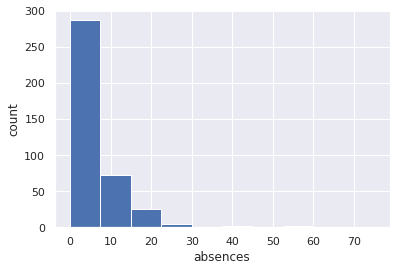

In [0]:
# histogram、データの指定
plt.hist(student_data_math['absences'])

# x軸とy軸のそれぞれのラベル
plt.xlabel('absences')
plt.ylabel('count')

# グリッドをつける
plt.grid(True)

上記のヒストグラムを観察すると、0から10までの付近にデータが集中しているのがわかります。一方、70以上など（の数字）もあり、ロングテールな分布になっています。ロングテールとは、分布の裾が緩やかに減少しているような分布です。なお、上のような分布を「右に歪みのある分布」といい、見た目とは異なり、よく間違えられるので表現に注意しましょう。

### 6.3.2 平均、中央値、最頻値
このヒストグラムは、データの全体像を見る上では欠かせないものですが、どのような時にデータが偏っているといえるのかなどの情報は読み取れず、客観性が少し乏しくなります。そのため、次の要約統計量（中央値、平均、標準偏差など）について計算することで、データの傾向を数値化し、より客観的にデータを表現することができます。

In [0]:
# 平均値
print('平均値：', student_data_math['absences'].mean())
# 中央値：中央値でデータを分けると中央値の前後でデータ数が同じになる（データの真ん中の値）、外れ値の値に影響を受けにくい
print('中央値：', student_data_math['absences'].median())
# 最頻値：最も頻度が多い値
print('最頻値：', student_data_math['absences'].mode())

平均値： 5.708860759493671
中央値： 4.0
最頻値： 0    0
dtype: int64


なお、平均値$\overline{x}$の計算式は以下の通りです。ここで$x_i$を第$i$番目のデータ（値）とします。

\begin{eqnarray}
\overline{x}=\frac{1}{n}\sum^n_{i=1}x_i
\end{eqnarray}

### 6.3.3 分散と標準偏差
次に、このデータが散らばっているのか、それともまとまっている（平均付近に固まっている）のかを調べるのが分散です。分散の計算式は以下の通りです。分散は$\sigma^2$と示すことが一般的です。

\begin{eqnarray}
\sigma^2 = \frac{1}{n-1}\sum^n_{i=1}(x_i-{\overline{x}} )^2
\end{eqnarray}

該当の変数を指定した後に、`var()`で計算できます。値が小さいほど、データの散らばりが少ないことを意味しています。

In [0]:
# 分散
student_data_math['absences'].var()

64.050

標準偏差は分散の平方根で、以下のようになります。標準偏差は$\sigma$で示すことが一般的です。

\begin{eqnarray}
\sigma = \sqrt{\frac{1}{n-1}\sum^n_{i=1}(x_i-{\overline{x}} )^2}
\end{eqnarray}

分散では、実際のデータのばらつきがどの程度かわかりません。なぜなら、上記で提示した分散の定義式を見るとわかるように、計算式で二乗しているためです。標準偏差にすれば、単位の次元が実際のデータと同じなので、以下の結果から±8日程度のばらつきがあることが分かります。標準偏差は`std()`で計算できます。

In [0]:
# 標準偏差 σ
student_data_math['absences'].std()

8.003

なお平方根は、`np.sqrt`で平方根の計算ができるので、以下の方法で計算しても同じです。

In [0]:
np.sqrt(student_data_math['absences'].var())

8.003

### 6.3.4 要約統計量とパーセンタイル値
これまで、1つ1つの統計量を見てきましたが、Pandasで読み込んだ`DataFrame`の`describe`メソッドを実行すると、これまで求めてきた統計量を、まとめて確認できます。
`describe`メソッドでは、それぞれ順にデータ数、平均値、標準偏差、最小値、25、50、75パーセンタイル値、そして最大値を計算できます。
なお「パーセンタイル値」とは、全体を100として小さい方から数えて何番になるのかを示す数値です。たとえば、10パーセンタイルは100個のデータのうち小さいほうから数えて10番目ということになります。50パーセンタイルだと50番目で真ん中の値となり、中央値になります（下図参照）。25%タイルと75%タイルはそれぞれ第1四分位点、第3四分位点とも呼びます。

![comment](http://ghw.pfizer.co.jp/comedical/evaluation/images/img_relation_01.gif)

参照URL：http://ghw.pfizer.co.jp/comedical/evaluation/images/img_relation_01.gif

In [0]:
# 要約統計量
student_data_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

#### 四方位範囲を求める

`describe`メソッドの結果は、`Series`オブジェクトに入ります。


それぞれの要素は、`describe()[インデックス番号]`として取得できます。たとえば、平均値を示す`mean`の値は、`describe()[1]`、標準偏差を示す`std`の値は`describe()[2]`です。

それぞれの要素を参照すれば、その値を使った計算ができます。たとえば、**四分位範囲**と呼ばれる75%タイルと25%タイルの差を計算したいときは、上から5番目と7番目の要素になるので、それらを使って次のように計算します。

In [0]:
# 四分位範囲(75%タイル ー 25%タイル)
student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]

8.000

#### 全列を対象とした結果を求める

`describe`メソッドで列名や要素を指定せずに実行すると、すべての量的データの要約統計量を求めることができます。まとめて計算する場合は便利です。他、列を絞り込んで計算することもできます。

In [0]:
# 要約統計量まとめて計算
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### 6.3.5 箱ひげ図

さて、これまで最大値、最小値、中央値、四分位範囲などを算出してきましたが、ただ数字を見ているだけでは、比較などが難しいので、それらをグラフ化してみましょう。そのときに使うのが、次の「箱ひげ図」です。

下記の2つの例は、「1期目の成績G1」「欠席数」の箱ひげ図をそれぞれ描いたものです。特徴としてかなり異なるのがわかります。

箱ひげ図は、箱の上底が第3四分位点、下底が第1四分位点、真ん中の線が中央値です。ヒゲの上端が最大値、下端が最小値です。これで扱うデータの範囲等がわかります。

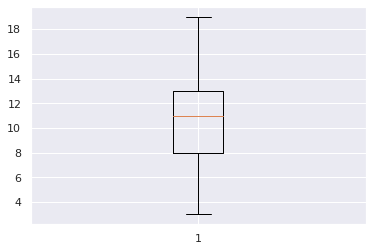

In [0]:
# 箱ひげ図：G1
plt.boxplot(student_data_math['G1'])
plt.grid(True)

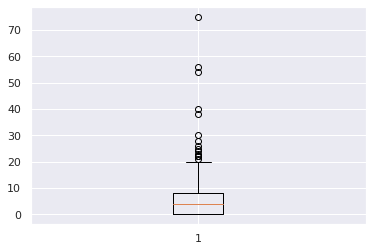

In [0]:
# 箱ひげ図：欠席数
plt.boxplot(student_data_math['absences'])
plt.grid(True)

なお、データに外れ値がある場合、それが省かれて、箱ひげ図が表示されるので注意しましょう。先ほどの欠席数`absences`を見ると、最大値が75なのに、グラフ上には出てきていないので、気づいている方もいるかもしません。外れ値はデフォルトで指定されており、それを取り除いた場合のグラフが表示されます。

なお、外れ値は異常値ともいわれ、厳密な定義は特に決まっていません。各業界の慣習で決まることもあります。上記のグラフは外れ値を省略していますが、省かないときもあります。外れ値や異常値については、本書のレベルを超えてしまいますので、詳しくは割愛します。

他の変数でも箱ひげ図が描けるので、やってみましょう。

>**[やってみよう]**
>
>他の変数についても、箱ひげ図を表示させてみましょう。どんな図になっているでしょうか。そこから何かわかることがないか考察してみましょう。

なお、以下のように複数の箱ひげ図を同時に表示することもできます。

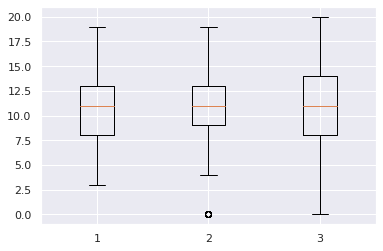

In [0]:
# 箱ひげ図：G1,G2,G3
plt.boxplot([student_data_math['G1'], student_data_math['G2'], student_data_math['G3']])
plt.grid(True)

### 6.3.6 変動係数

次に、**変動係数**について説明していきます。

先ほど、分散や標準偏差について見てきましたが、異なる種類のデータ同士について、これらの単純比較はできません。データの大きさがそもそも異なると、大きな値をとるものの方が偏差も大きくなる傾向にあるからです。たとえば、株価（日経平均など）の標準偏差と為替（ドル円など）の標準偏差をそれぞれ計算するとしましょう。この2つの標準偏差を直接比較するのはナンセンスです。なぜなら2万円前後で動いている日経平均と100円前後で動いている為替の標準偏差とでは、スケールが異なるからです。

そこで登場するのが変動係数です。変動係数は、標準偏差を平均値で割った値です。この値を使うとスケールに依存せず、比較できるようになります。変数は$CV$で示すことが一般的です。

\begin{eqnarray}
CV = \frac{\sigma}{\overline{x}}\
\end{eqnarray}

In [0]:
# 変動係数：欠席数
student_data_math['absences'].std() / student_data_math['absences'].mean()

1.402

なお、`describe()`の結果に変動係数は出力されませんが、以下のようにすれば、一気に算出できます。それぞれの要素ごとに計算されるのがPandasのDatarFrame（もしくは、Numpy）の特徴です。この結果を見ると、落第数（`failures`）と欠席数（`absences`）のデータの散らばり具合が大きいことがわかります。

In [0]:
# それぞれの変動係数をまとめて計算
student_data_math.std() / student_data_math.mean() 

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

### 6.3.7 散布図と相関係数

さて、これまでは基本的に1変数のみに着目して、グラフや要約統計量を算出してきました。次に、変数間の関係性を見ていくために、散布図と相関係数について学びましょう。

次の散布図は、1期目の成績G1と最終成績G3の関係を示しています。

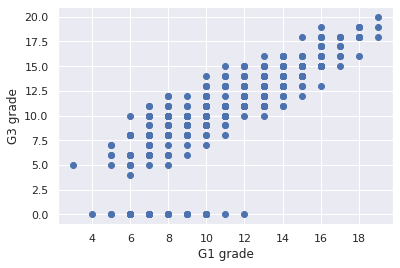

In [0]:
# 散布図
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')

# ラベル
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

初めから成績がいい（G1の値が大きい）人ほど後の成績もいい（G3の値が大きい）というのは当たり前の結果ですが、傾向としてはっきりと表れているのがグラフからわかります。

補足として、このグラフをよく見てみると、最終成績（G3）が0である人がいるのがわかります。一期の成績で0である人はいなかったので、これが異常値なのか、正しい値なのかはデータを見ているだけでは判断できませんが、データとしてG3の成績のスコアが0から20とあるので正しい値だと判断し、このままで扱うことにします（G3の成績のスコアは、前述のstudent_data_math.describe()の結果で「G3」の列を確認するとわかります）。

ビジネスの現場では、なぜこのような値になっているか原因を突き止めるため、このデータに詳しい人、システム関係の人たちとヒアリングしながら理解していきます。もし、欠損値等であった場合には、対処方法は色々とありますが、後の章で学ぶことにしましょう。

#### 共分散
次に、2変数の関係性について、数値化してみることを考えます。2つの変数の関係性を見るための指標として**共分散**があり、その定義は、下記の通りです。共分散が$S_{xy}$で、$x, y$という2つの変数の関係性を示しています。

\begin{eqnarray}
S_{xy} = \frac{1}{n}\displaystyle \sum_{i = 1}^n (x_i - \overline{x})
(y_i - \overline{y})
\end{eqnarray}

共分散は、2組の変数の偏差の積の平均値です。2組以上の変数の分散を考えるときに使われます。Numpyには共分散の行列（共分散行列）を算出する機能があり、次のように`cov`関数を使うと求められます。以下ではG1とG3の共分散を計算しています。


In [0]:
# 共分散行列
np.cov(student_data_math['G1'], student_data_math['G3'])

array([[11.017, 12.188],
       [12.188, 20.99 ]])

結果の行列の意味は、次の通りです。

- G1とG3の共分散 … 共分散行列の$(1,2)$と$(2,1)$の要素です。上の例では、12.188という値です。
- G1の分散 … 共分散行列の$(1,1)$の要素です。上の例では11.017です
- G3の分散 … 共分散行列の$(2,2)$の要素です。上の例では20.99です。

それぞれG1とG3の分散は、すでに説明したように`var`関数で計算できます。実際に求めてみると、値が合致することがわかります。

In [0]:
# 分散
print('G1の分散:',student_data_math['G1'].var())
print('G3の分散:',student_data_math['G3'].var())

G1の分散: 11.017053267364899
G3の分散: 20.989616397866737


#### 相関係数

共分散はその定義式から、各変数のスケールや単位に依存してしまいます。そのスケールの影響を受けずに、2つの変数の関係を数値化するのが相関係数です。共分散をそれぞれの変数（ここでは$ x $と$ y $）の標準偏差で割った数式が相関係数です。その定義は、以下の通りです。相関係数は$r_{xy}$で示すことが一般的です。

\begin{eqnarray}
r_{xy} = \frac{\displaystyle \sum_{i = 1}^n (x_i - \overline{x})
(y_i - \overline{y})}{\sqrt{\displaystyle \sum_{i = 1}^n 
(x_i - \overline{x})^2}\sqrt{\displaystyle \sum_{i = 1}^n 
(y_i - \overline{y})^2}}
\end{eqnarray}

この相関係数は、-1から1までの値を取り、1に近ければ近いほど**正の相関**があるといい、-1に近ければ近いほど**負の相関**があるといいます。0に近い場合は、**無相関**であるといいます。

Pythonでは、ピアソン関数が計算できるScipyの`pearsonr`を使って、2変数の相関係数を算出できます。たとえば、次のようにすると、G1とG3の相関係数を求められます。データ分析の現場で単に相関関数という場合には、ピアソン関数を指します。

In [0]:
sp.stats.pearsonr(student_data_math['G1'], student_data_math['G3'])

(0.801, 0.000)

結果は、「0.8」と相関関係がある高い数字が出ました。なお、計算結果の2つ目の値はp値という値で、詳しくは「4.7.1 検定」で解説しています。

この数字については、厳密に高い低いというのはなく、またこれが高いからといって**因果関係**があるとは言えないので注意しましょう（なお、本講座では詳しく扱いませんが、因果関係を把握したい場合には、**実験計画法**と呼ばれるアプローチなどを使っていきます。具体的には、あるマーケティング施策で、ある広告を見て効果があったのかなかったのか、因果関係を知りたい場合に、広告を見せる処置群と何も広告を見せないコントロール群に分けて、その比率等を計算していきます）。

次の計算は、相関行列を算出するものです。それぞれの変数について、すべての組み合わせで相関係数を算出しています。先ほどのG1とG3の相関係数は0.801ですし、自分自身の相関係数は1になるのが自明ですから、この結果になるのは明らかです。

In [0]:
# 相関行列
np.corrcoef([student_data_math['G1'], student_data_math['G3']]) 

array([[1.   , 0.801],
       [0.801, 1.   ]])

### 6.3.8 すべての変数のヒストグラムや散布図を描く

最後に、各変数のヒストグラムをすべて表示したり、散布図を描く方法を紹介します。

このような処理には、統計的データ分析と可視化に関する機能が豊富に用意されているSeabornというライブラリを利用すると便利です。`seaborn`パッケージの`pairplot`を使えば、さまざまな変数の関係性を一度に確認できるので、とても便利です。ただし、変数が多いと計算に時間がかかり、若干見にくくなります。その場合は、「2.4.5　データの抽出」で説明した方法で該当データを絞り込むなどするとよいでしょう。

サンプルとして、先ほどのデータにおいて、アルコールの摂取量と成績のスコアに関係があるのか、見てみることにします。

Dalcは平日のアルコール摂取量、Walcは週末のアルコール摂取量です。それらと1期目の成績（G1）、最終成績（G3）の関係を見ています。アルコールを飲むからといって、成績が悪いと言えるのでしょうか。それとも関係ないのでしょうか。


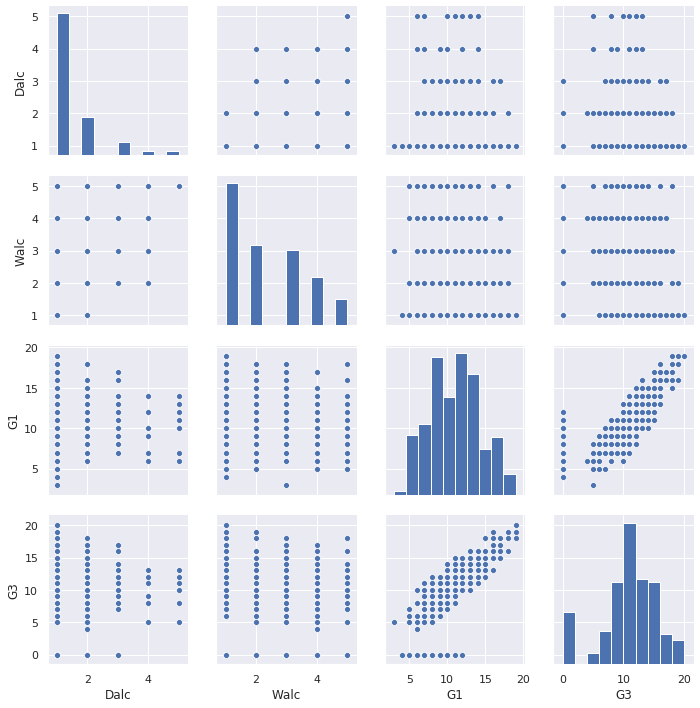

In [0]:
sns.pairplot(student_data_math[['Dalc', 'Walc', 'G1', 'G3']])
plt.grid(True)

In [0]:
# 例：週末にアルコールを飲む人の1期目の成績の平均値
student_data_math.groupby('Walc')['G1'].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64

グラフから、平日にアルコールを頻繁に飲んでいる人（4や5の人）はG3で好成績を取っている人はいないようですが、極端に悪い成績を取っている人もいないようです。また、週末にアルコールを飲まない人の方が1期目の成績は少し良さそうに見えますが、こう結論付けて良いのでしょうか。これらのグラフや数値だけでは、なかなか判断が難しいですが、次の統計の章や機械学習の章でもアプローチしてみます。



以上で、記述統計に関する基礎的事項は終わります。

とても基本的ですが、ここで説明した内容は、どのようなデータ分析をする場合でも、データの全体像をつかむために必要な作業です。

この講座では、機械学習のライブラリ等を使って、簡単に機械学習の計算ができることを紹介していきますが、その一方で、今までやってきた基礎的な統計量を見ていくことも大事であることは強調しておきます。簡単な散布図を書くだけで重要な傾向がわかることもあります。また、ここまでの内容はおそらく数学的なバックグラウンドがない人でもついていきやすく、説明がしやすいはずです。

もちろん、これだけで終わるならば機械学習は必要なくなりますが、機械学習を適用する前に、データと対話をして、不明事項や異常値の確認をするなど、関係者と密に連携をとっておけば、よりよいデータ分析ができます。

>**[ポイント]**

>データ分析をするときにはまず基本統計量やヒストグラム、散布図等を見て、データの全体像を掴もう。

#### <練習問題 6-1>

本章でダウンロードしたポルトガル語の成績データであるstudet-por.csvを読み込んで、要約統計量を表示してください。

In [0]:
student_data_por = pd.read_csv('student-por.csv', sep=';')
student_data_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


#### <練習問題 6-2>

以下の変数をキーとして、数学のデータとポルトガル語のデータをマージしてください。マージするときは、両方にデータが含まれている（欠けていない）データを対象としてください（内部結合と言います）。

そして、要約統計量など計算してください。

なお、以下以外の変数名は、それぞれのデータで同名の変数名があり重複するので、`suffixes=('_math', '_por')`のパラメータを追加して、どちらからのデータかわかるようにしてください。

`['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','nursery','internet']`

In [0]:
student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [0]:
len(student_data_math.columns)

33

In [0]:
len(student_data_math)

395

In [0]:
student_data_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [0]:
student_data_por = pd.read_csv('student-por.csv', sep=';')
student_data_por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [0]:
len(student_data_por.columns)

33

In [0]:
len(student_data_por)

649

In [0]:
student_data_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [0]:
student_data_math.columns==student_data_por.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [0]:
# マージする(内部結合)
student_data_merge = pd.merge(student_data_math
                              , student_data_por
                              , on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu'
                                      , 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']
                              , suffixes=('_math', '_por'))
student_data_merge

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_math,traveltime_math,studytime_math,failures_math,schoolsup_math,famsup_math,paid_math,activities_math,nursery,higher_math,internet,romantic_math,famrel_math,freetime_math,goout_math,Dalc_math,Walc_math,health_math,absences_math,G1_math,G2_math,G3_math,guardian_por,traveltime_por,studytime_por,failures_por,schoolsup_por,famsup_por,paid_por,activities_por,higher_por,romantic_por,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,mother,2,2,0,yes,no,no,no,yes,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,father,1,2,0,no,yes,no,no,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,mother,1,2,0,yes,no,no,no,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,mother,1,3,0,no,yes,no,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,father,1,2,0,no,yes,no,no,yes,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,4,1,1,1,0,7,9,8,mother,1,2,0,no,yes,no,no,yes,no,4,3,4,1,1,1,4,15,15,16
378,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0,mother,3,2,2,no,no,no,yes,yes,yes,3,4,4,2,2,5,3,7,8,7
379,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0,mother,2,2,0,no,no,no,yes,yes,no,1,1,1,1,1,5,6,11,12,9
380,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,mother,2,1,0,no,no,no,no,yes,no,2,4,5,3,4,2,6,10,10,10


In [0]:
student_data_math.traveltime.values==student_data_por.traveltime.values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


False

In [0]:
student_data_merge.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_math', 'traveltime_math',
       'studytime_math', 'failures_math', 'schoolsup_math', 'famsup_math',
       'paid_math', 'activities_math', 'nursery', 'higher_math', 'internet',
       'romantic_math', 'famrel_math', 'freetime_math', 'goout_math',
       'Dalc_math', 'Walc_math', 'health_math', 'absences_math', 'G1_math',
       'G2_math', 'G3_math', 'guardian_por', 'traveltime_por', 'studytime_por',
       'failures_por', 'schoolsup_por', 'famsup_por', 'paid_por',
       'activities_por', 'higher_por', 'romantic_por', 'famrel_por',
       'freetime_por', 'goout_por', 'Dalc_por', 'Walc_por', 'health_por',
       'absences_por', 'G1_por', 'G2_por', 'G3_por'],
      dtype='object')

In [0]:
len(student_data_merge.columns)

53

#### <練習問題 6-3>

<練習問題 6-2>でマージしたデータについて、`Medu`、`Fedu`、`G3_math`などの変数をいくつかピックアップして、散布図とヒストグラムを作成してみましょう。どういった傾向がありますか。また、数学データのみの結果と違いはありますか。考察してみましょう。

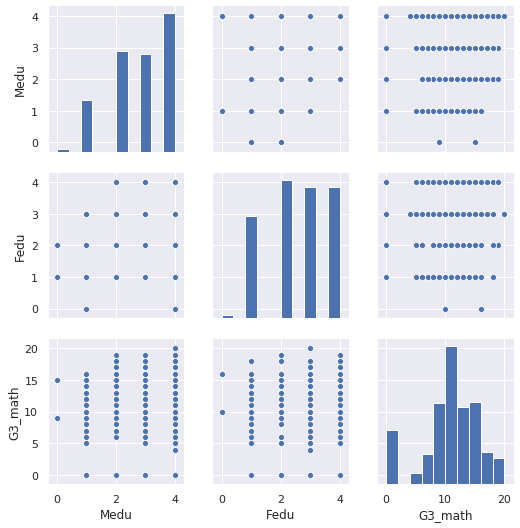

In [0]:
sns.pairplot(student_data_merge[['Medu', 'Fedu', 'G3_math']])
plt.grid(True)

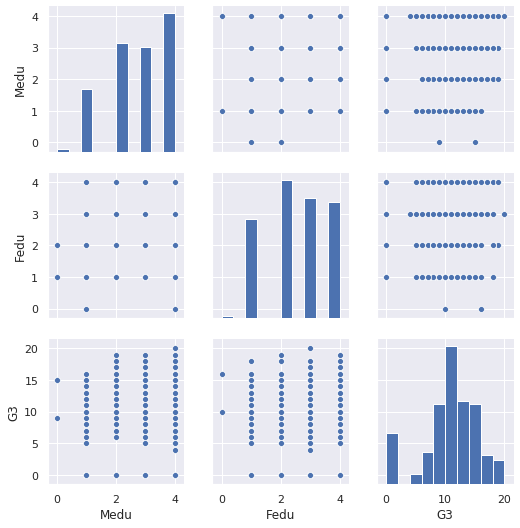

In [0]:
sns.pairplot(student_data_math[['Medu', 'Fedu', 'G3']])
plt.grid(True)

***

False

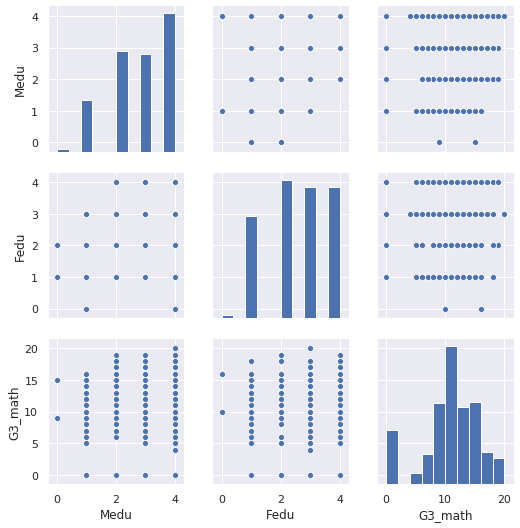

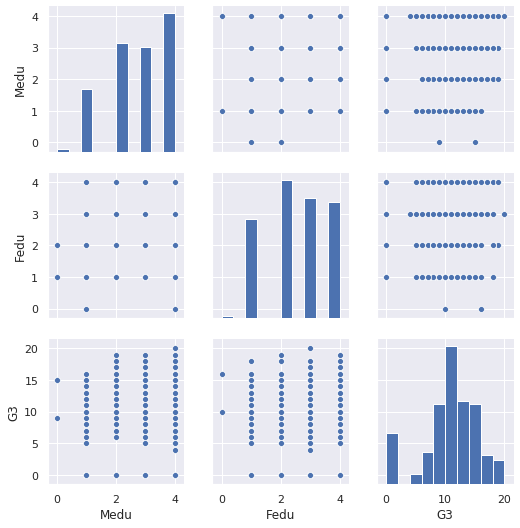

In [0]:
sns.pairplot(student_data_merge[['Medu', 'Fedu', 'G3_math']]) == sns.pairplot(student_data_math[['Medu', 'Fedu', 'G3']])

## 6.4 単回帰分析
キーワード：Scikit-learn、目的変数、説明変数、単回帰分析、最小二乗法、決定係数

記述統計の次は、回帰分析の基礎を学びましょう。
回帰分析とは、数値を予測する分析です。機械学習では、データの予測をしますが、その基礎となるのが、ここで説明する単回帰分析です。

先ほど、学生のデータについて、一期目の数学の成績と最終期の数学の成績をグラフ化（散布図）してみました。この散布図からG1とG3には関係がありそうだというのはわかります。

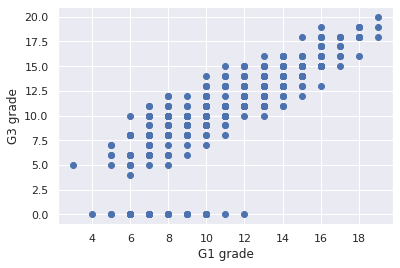

In [0]:
# 散布図
plt.plot(student_data_math['G1'], student_data_math['G3'], 'o')
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')
plt.grid(True)

回帰問題では、与えられたデータから関係式を仮定して、データに最も当てはまる係数を求めていきます。具体的には、あらかじめ分かっているG1の成績をもとに、G3の成績を予測します。つまり、目的となる変数G3（**目的変数**といいます）があり、それを説明する変数G1（**説明変数**といいます）を使って予測します。これは後ほど機械学習の章で学ぶ「教師あり学習」の1つでもあり、学習時のデータに正解を1つ1つ与えて、その関係性を計算する基礎となるものです。

回帰分析の手法は、アウトプット（目的変数）とインプット（説明変数）の関係において、インプットが1変数のものと、2変数以上あるもので、大きく分けられます。前者を単回帰分析、後者を重回帰分析と言います。この節では単純な単回帰分析について説明することにし、重回帰分析については後の機械学習の章で改めて説明します。

なお、この節で学ぶ内容を厳密に理解するためには、次の章で学ぶ統計や推定、検定の知識等が必要です。実際、多くの統計の教科書では、これらの知識を学んだ後で回帰分析について解説しています。

しかしPythonを使って回帰分析する場合、そうした知識がなくてもScikit-learnという抽象度の高いライブラリを利用することで計算できるため、ここでは、先に実際の計算の方法を説明することにします。この章の内容は、もう少し先に進んでから、後で振り返って復習すると、より深く理解できるはずです。

### 6.4.1 線形単回帰分析

ここでは単回帰分析のうちでも、アウトプットと**パラメータ**が線形の関係に成り立つ（ $ y = ax + b $ ）ことを前提とした線形単回帰という手法で回帰問題を解く方法を説明します。
線形単回帰分析は、Scikit-learnというライブラリに用意されている`sklearn.linear_model`を使うと簡単に計算できます。Scikit-learnは機械学習のためのパッケージです。このパッケージは、後の機械学習の章で、さらにさまざまな計算をする場面でも利用します。まず、以下のように`linear_model`をインポートした後、インスタンスを作ります。

In [0]:
from sklearn import linear_model

# 線形回帰のインスタンスを生成
reg = linear_model.LinearRegression()

以下では、説明変数（$X$とします）と目的変数（$Y$とします）データをセットして、線形回帰する`fit`という機能を使って、予測モデルを計算します。

この場合の`fit`関数は、**最小二乗法**という手法で回帰係数$a$と切片$b$を計算しています。この方法は、実際の目的変数のデータと予測したデータの差の二乗和をとり、それが最小になる時の係数と切片を求めるものです。式で表現すると、$y$を実測値、$ f(x) = ax + b $を予測値として、以下の式を最小にするように計算しています（計算方法としては、この式を微分していくのですが、`fit`関数を実行すれば、その計算をしてくれるので詳細は割愛します）。

\begin{eqnarray}
\sum^n_{i=1}(y_i-f(x_i))^2
\end{eqnarray}

In [0]:
# 説明変数に "一期目の数学の成績" を利用
# locはデータフレームから、行と列を指定して取り出す。loc[:, ['G1']]は、G1列のすべての列を取り出すことをしている
# valuesに直しているので、注意
X = student_data_math.loc[:, ['G1']].values

# 目的変数に "最終の数学の成績" を利用
Y = student_data_math['G3'].values
 
# 予測モデルを計算、ここでa,bを算出
reg.fit(X, Y)
 
# 回帰係数
print('回帰係数:', reg.coef_)
 
# 切片 
print('切片:', reg.intercept_)

回帰係数: [1.106]
切片: -1.6528038288004634


上記の回帰係数が線形の回帰式 $ y = ax + b $ における$ a $に相当し、切片に相当するのが$b$です。先ほどの散布図と重ねて、予測した線形回帰式を描いてみましょう。$Y$、つまり予測したい最終の数学の成績G3は、`predict`を使って、括弧の中に説明変数を入れることで計算できます。

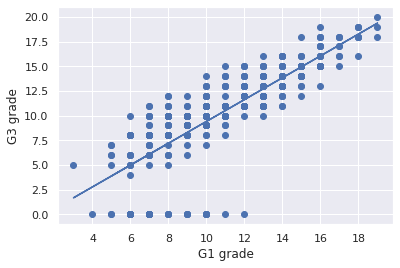

In [0]:
# 先ほどと同じ散布図
plt.scatter(X, Y)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

# その上に線形回帰直線を引く
plt.plot(X, reg.predict(X))
plt.grid(True)

### 6.4.2 決定係数

上記のグラフを見ると予測式は実測値をうまく予測しているようにも見えますが、これが客観的にどうなのかというのは判断がつきません。そこで、それを数値化したものが、**決定係数**です。決定係数は寄与率とも呼ばれます。定義は以下のとおりです。決定係数は$R^2$と示すことが一般的です。

\begin{eqnarray}
R^2 = 1 - \frac{\sum_{i = 1}^n(y_i - f(x_i))^2}{\sum_{i = 1}^{n}(y_i - \bar{y})^2}
\end{eqnarray}

$R^2$は最大で1の値を取り、1に近ければ近いほど良いモデルになります。$\bar{y}$は目的変数の平均値です。説明変数を使わずに常に$\bar{y}$（定数）で予測した場合と二乗誤差が等しい場合に $R^2=0$ となります。Pythonを使って決定係数を求めるには、`score`を使って以下のようにします。

In [0]:
# 決定係数、寄与率とも呼ばれる
print('決定係数:', reg.score(X, Y))

決定係数: 0.6423508460522701


なお、この決定係数の数値がどこまで高ければ良いのかという問題はあります。教科書的なデータや問題では0.9以上の場合が多いですが、実務ではなかなかそこまで出せることはなく、それをどう判断するかはケースバイケースです。ちなみに、上の0.64は高くはありませんが、現場レベルで見ると、使えないレベルでもありません。

以上で、単回帰分析と本章の説明は終わりになります。お疲れ様でした。残りは、練習問題と総合演習問題になります。ぜひチャレンジしてください。

#### <練習問題 6-4>


ポルトガル語の成績データであるstudent-por.csvのデータを使って、`G3`を目的変数、`G1`を説明変数として単回帰分析を実施し、回帰係数、切片、決定係数を求めてください。

In [0]:
from sklearn import linear_model

# 線形回帰のインスタンスを生成
reg = linear_model.LinearRegression()
# 説明変数に "一期目の数学の成績" を利用
# locはデータフレームから、行と列を指定して取り出す。loc[:, ['G1']]は、G1列のすべての列を取り出すことをしている
# valuesに直しているので、注意
X_por64 = student_data_por.loc[:, ['G1']].values

# 目的変数に "最終の数学の成績" を利用
Y_por64 = student_data_por['G3'].values
 
# 予測モデルを計算、ここでa,bを算出
reg.fit(X_por64, Y_por64)
 
# 回帰係数
print('回帰係数por64:', reg.coef_)
 
# 切片 
print('切片por64:', reg.intercept_)
# 決定係数、寄与率とも呼ばれる
print('決定係数por64:', reg.score(X, Y))

回帰係数por64: [0.973]
切片por64: 0.8203984121064583
決定係数por64: 0.6829156800171085


#### <練習問題 6-5>

練習問題6-4のデータの実際の散布図と、回帰直線を合わせてグラフ化してください。

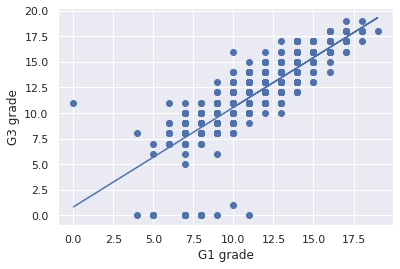

In [0]:
# 先ほどと同じ散布図
plt.scatter(X_por64, Y_por64)
plt.xlabel('G1 grade')
plt.ylabel('G3 grade')

# その上に線形回帰直線を引く
plt.plot(X_por64, reg.predict(X_por64))
plt.grid(True)

#### <練習問題 6-6>

student-por.csvのデータを使って、`G3`を目的変数、`absences`（欠席数）を説明変数として単回帰分析を実施し、回帰係数、切片、決定係数を求めてください。また、散布図と回帰直線をグラフ化してみましょう。そして、この結果を見て、考察してみましょう。

回帰係数abs66: [-0.064]
切片abs66: 12.138800862687443
決定係数abs66: -0.11552464866077504


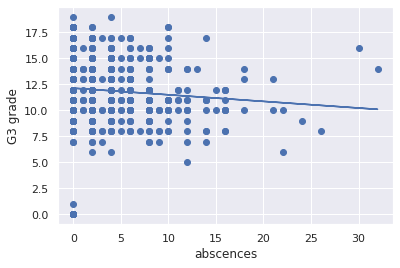

In [0]:
from sklearn import linear_model

# 線形回帰のインスタンスを生成
reg = linear_model.LinearRegression()

X_abs66 = student_data_por.loc[:, ['absences']].values

# 目的変数に "最終の数学の成績" を利用
Y_abs66 = student_data_por['G3'].values
 
# 予測モデルを計算、ここでa,bを算出
reg.fit(X_abs66, Y_abs66)
 
# 回帰係数
print('回帰係数abs66:', reg.coef_)
 
# 切片 
print('切片abs66:', reg.intercept_)
# 決定係数、寄与率とも呼ばれる
print('決定係数abs66:', reg.score(X, Y))
# 先ほどと同じ散布図
plt.scatter(X_abs66, Y_abs66)
plt.xlabel('abscences')
plt.ylabel('G3 grade')

# その上に線形回帰直線を引く
plt.plot(X_abs66, reg.predict(X_abs66))
plt.grid(True)

欠席が増えるほどG3の成績が緩やかに下降する。

***

## 6.5 総合問題

### ■総合問題6-1 統計の基礎と可視化

以下のサイトにあるデータ（ワインの品質）を読み込み、以下の問いに答えてください。

http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

（1）要約統計量（平均、最大値、最小値、標準偏差など）を算出してください。

（2）それぞれの変数の分布と、それぞれの変数の関係性（2変数間のみ）がわかるように、グラフ化してみましょう。何かわかる傾向はありますか。

In [0]:
#（1）要約統計量（平均、最大値、最小値、標準偏差など）を算出してください。
# データがあるurlの指定
url_winequality_data = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
# データをurlから取得する
df_wine = pd.read_csv(url_winequality_data, sep=';') #sepは区切り文字
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [0]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

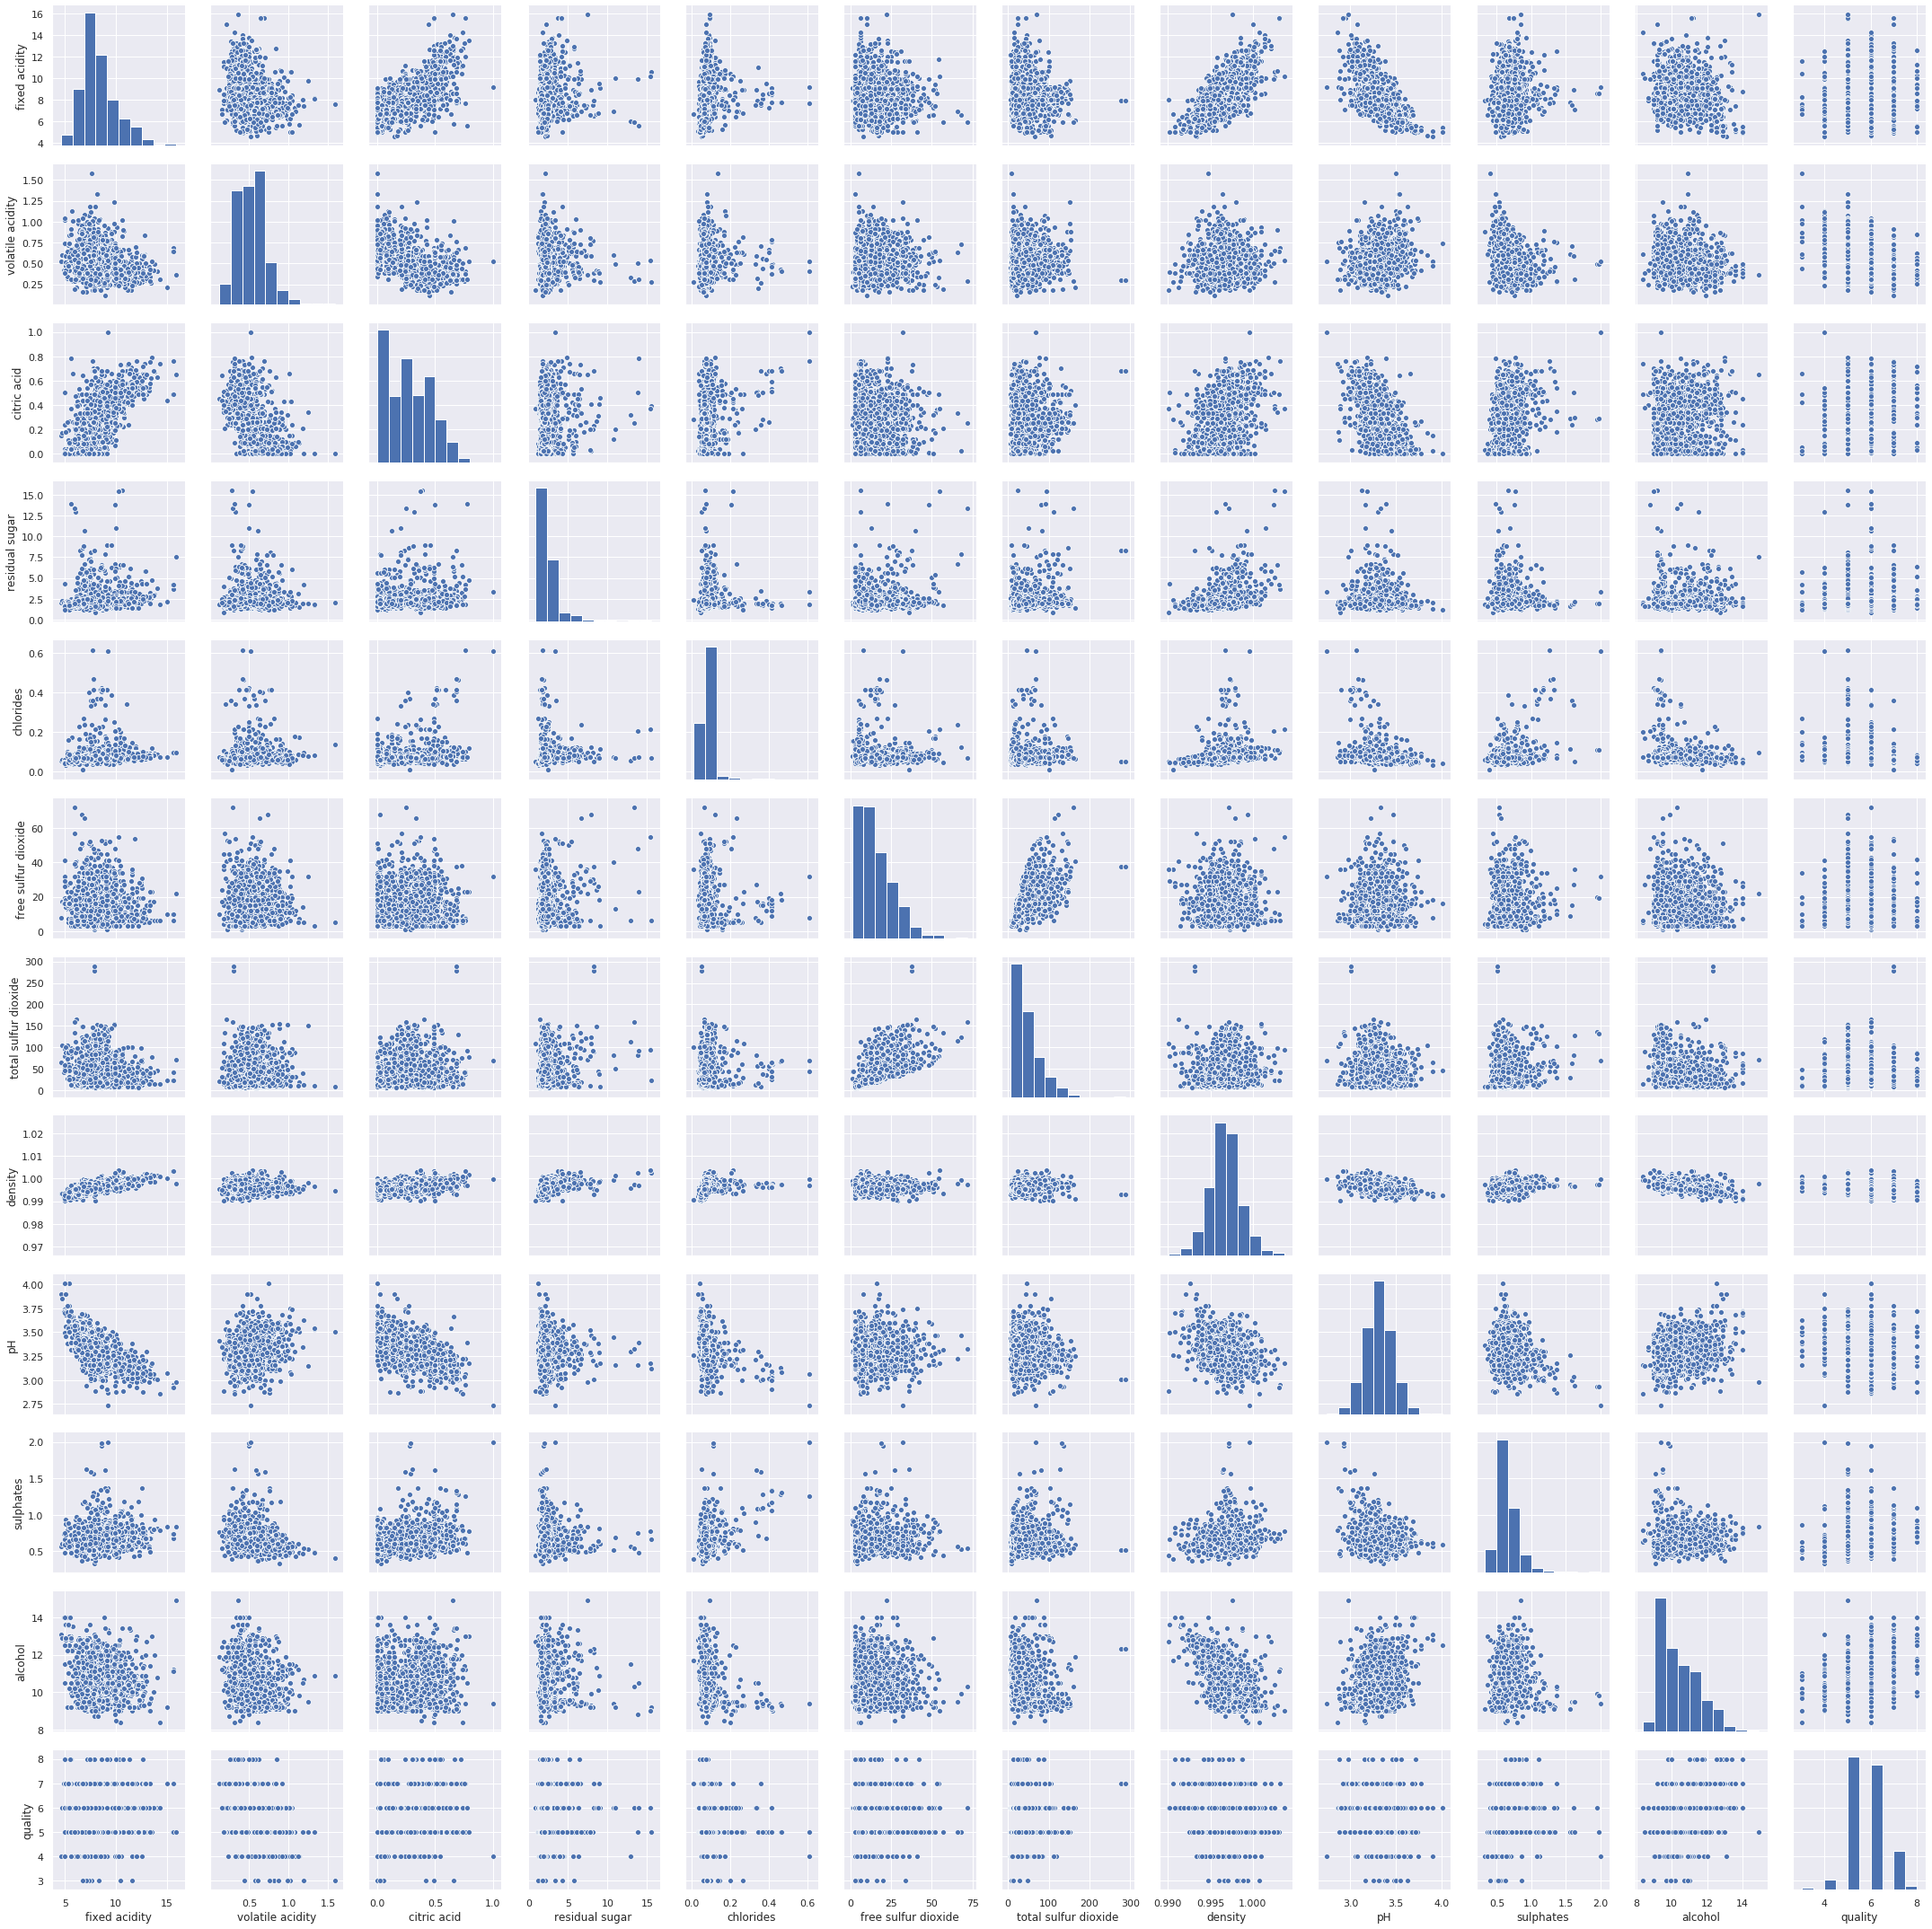

In [0]:
#（2）それぞれの変数の分布と、それぞれの変数の関係性（2変数間のみ）がわかるように、グラフ化してみましょう。何かわかる傾向はありますか。
sns.pairplot(df_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']])
plt.grid(True)

### ■総合問題6-2 ローレンツ曲線とジニ係数

この章で利用したサンプルデータstudent_data_mathのデータを使って、以下の問いに答えてください。ここで扱うローレンツ曲線やジニ係数は、貧富の格差（地域別、国別など）を見るための指標として使われています（なお、本問題は少し難易度が高いため、参考程度に見てください。詳細は、以前に紹介した統計学入門などの文献を参照するか、ネットで検索してください）。

（1）一期目の数学データについて、男女別に昇順に並び替えをしてください。そして、横軸に人数の累積比率、縦軸に一期目の値の累積比率をとってください。この曲線をローレンツ曲線といいます。このローレンツ曲線を男女別に一期目の数学成績でグラフ化してください。

（2）不平等の程度を数値で表したものをジニ係数といいます。この値は、ローレンツ曲線と45度線で囲まれた部分の面積の2倍で定義されて、0から1の値を取ります。値が大きければ大きいほど、不平等の度合いが大きくなります。なお以下のようにジニ係数は定義できます。$\overline{x}$は平均値です。

\begin{eqnarray}
GI=\sum_{i}\sum_{j}\left| \frac{x_i-x_j}{2n^2 \overline{x}}\right|
\end{eqnarray}

これを利用して、男女の一期目の成績について、ジニ係数をそれぞれ求めてください。

In [0]:
#（1）1．一期目の数学データについて、男女別に昇順に並び替えをしてください。
student_data_math = pd.read_csv('student-mat.csv', sep=';')
student_data_math_sex = student_data_math.sort_values(by=["sex"], ascending=True)
df_F = student_data_math_sex[student_data_math_sex.sex == "F" ].G1.sort_values()
df_F

137     4
0       5
79      5
1       5
221     6
       ..
198    18
293    18
359    18
286    18
374    19
Name: G1, Length: 208, dtype: int64

In [0]:
df_M = student_data_math_sex[student_data_math_sex.sex == "M" ].G1.sort_values()
df_M

248     3
164     5
161     5
153     5
144     5
       ..
110    18
129    18
245    18
42     19
47     19
Name: G1, Length: 187, dtype: int64

In [0]:
#2．横軸に人数の累積比率、縦軸に一期目の値の累積比率をとってください。この曲線をローレンツ曲線といいます。
import numpy as np

len_F = np.arange(len(df_F))
len_M = np.arange(len(df_M))


cumsum : https://deepage.net/features/numpy-diff.html

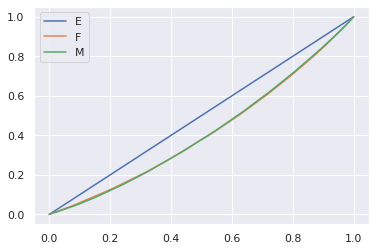

In [0]:
#3．このローレンツ曲線を男女別に一期目の数学成績でグラフ化してください。
plt.plot(len_F/len_F.max(), len_F/len_F.max(), label='E')
plt.plot(len_F/len_F.max(), df_F.cumsum()/df_F.sum(), label='F')
plt.plot(len_M/len_M.max(), df_M.cumsum()/df_M.sum(), label='M')
plt.legend()
plt.grid(True)

In [0]:
#（2）不平等の程度を数値で表したものをジニ係数といいます。この値は、ローレンツ曲線と45度線で囲まれた部分の面積の2倍で定義されて、0から1の値を取ります。
#値が大きければ大きいほど、不平等の度合いが大きくなります。なお以下のようにジニ係数は定義できます。 x¯¯¯ は平均値です。
def heikinsa(data):
  subt = []
  for i in range(0, len(data)-1):
    for j in range(i+1, len(data)):
      subt.append(np.abs(data[i] - data[j]))
  return float(sum(subt))*2 / (len(data)**2)

In [0]:
def gini(heikinsa, data):
  return heikinsa / (2 * np.mean(data))

In [0]:
print("男性の数学の成績に関するジニ係数：", gini(heikinsa(np.array(df_M)), np.array(df_M)))
print("女性の数学の成績に関するジニ係数：", gini(heikinsa(np.array(df_F)), np.array(df_F)))

男性の数学の成績に関するジニ係数： 0.17197351667939903
女性の数学の成績に関するジニ係数： 0.1723782950865341


***

## 6.6 確率と統計を学ぶ準備

キーワード：Numpy、Scipy、Pandas、Matplotlib、ランダムシード

この章では、確率と統計を学びます。はじめに概念等について説明し、それから、少し理論的な話に入っていきます。


### 6.6.1 この章の前提知識
数式が若干多くなり、はじめは少しとっつきにくいかも知れませんが、徐々に慣れていきましょう。初心者向けに参考になるものとして、巻末の参考文献「A-5」、参考URL「B-10」を挙げておきます。これらもあわせて学習すると、確率・統計の基礎についてより理解ができると思います。

以降では、これらの基礎知識を見たことがあるという前提で、解説を進めていきます。

### 6.6.2 この章で使うライブラリのインポート
この章では、以前各種ライブラリを使います。次のようにインポートしていることを前提として、以下、進めていきます。

以下のプログラムの最後の行では「`np.random.seed(0)`」と記述してランダムシード（乱数を発生させるとき基準にする値）を0に設定しています。そのため発生する乱数の系列が0に設定されるため、パソコンの環境等によって得られる乱数の系列が違うようなことはなく、同じ乱数が発生するようになります。

In [0]:
# 以下のライブラリを使うので、あらかじめ読み込んでおいてください
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 小数第3位まで表示
%precision 3

# ランダムシードの固定
np.random.seed(0)

## 6.7 確率
キーワード：確率、試行、根元事象、標本空間、事象、条件付き確率、ベイズの定理、事前確率、事後確率

まずは、確率について学んでいきます。

### 6.7.1 数学的確率

はじめにサイコロを題材とし、確率を学ぶ上で必要となる用語や概念について説明します。

サイコロがとりうる状態は、1から6の数値です。そこでサイコロデータを次のようにNumpyの配列オブジェクトとして定義することにします。

In [0]:
# サイコロがとりうる値を配列に格納
dice_data = np.array([1, 2, 3, 4, 5, 6])

#### 事象
このデータから1つだけランダムに抽出することを考えます。これを**試行**といいます。Numpyでは`random.choice`の2番目の値に「1」を指定すると、ランダムなものを1つ取り出せます（ちなみに、仮に「2」を指定すれば2つ取り出せます）。これはサイコロを1回振って、どのような目が出るのかを確認するという操作に相当します。

In [0]:
# 引数は、対象データdice_dataから1つランダムに抽出するという意味
print('1つだけランダムに抽出:', np.random.choice(dice_data, 1))

1つだけランダムに抽出: [5]


上記の結果では「5」が抽出されていますが、実行のたびに違う値が取り出されますから、「1」や「3」など他の値である可能性もあります。こうした1つずつの試行結果のことを**根元事象（基本事象）**といいます。そして、すべての可能な根元事象を集めた集合を**標本空間（以下$S$で表します）**、標本空間の任意の部分集合を**事象**といいます。たとえば、先ほどの5が出る事象$X$や、以下のような偶数の事象$Y$などが考えられます。

\begin{eqnarray}
S=\{1, 2, 3, 4, 5, 6\}
\end{eqnarray}

\begin{eqnarray}
X=\{5\}
\end{eqnarray}

\begin{eqnarray}
Y=\{2, 4, 6\}
\end{eqnarray}

次にこれらの概念を使って、確率について学びます。確率については、その公理（厳密ではないですが、仮定のことと思ってください）は以下になります。ただ、はじめて見た方にはわかりにくいと思いますので、確率といえば、ひとまず$P(X)$ = 事象$X$が起こる場合の数/起こりうるすべての場合の数という理解をすれば大丈夫です。

>ある事象$E(Event)$が起こる確率を$P(E)$と記せば、次の公理を満たさなければならない。
>
>公理1：  任意の事象Eについて $0≦P(E)≦1$
>
>公理2： $ P(S)=1$ (補足：これは全事象の確率が1であることを意味します。)
>
>公理3：  $A∩B=\emptyset $ ならば、$P(A∪B) = P(A) + P(B)$

#### 空事象
その他、空集合$\emptyset$も事象としてあり、**空事象**と言います。空事象は、要素を全く持たない集合です。たとえば、サイコロに関して言えば、7の目が出ることは普通のサイコロではあり得ないので、これは空事象であり、その確率は0です。

#### 余事象

ある事象$E$に属さない結果の集合を**余事象**といいます。これは、$E$の**補集合**とも言い、以下のようにc（complement）を使って表現します。たとえば、

\begin{eqnarray}
E = \{2, 4, 6\}
\end{eqnarray}

のとき、余事象は

\begin{eqnarray}
E^c=\{1, 3, 5\}
\end{eqnarray}

になります。

#### 積事象と和事象

$A∩B$は、積事象といい、2つの事象に共通な事象のことを指します。具体的には、

\begin{eqnarray}
A=\{1, 2, 3\}
\end{eqnarray}

\begin{eqnarray}
B=\{1, 3, 4, 5\}
\end{eqnarray}

の2つの集合を考えた場合、共通している数字は1と3なので、

\begin{eqnarray}
A \cap B=\{1, 3\}
\end{eqnarray}

です。

$A∪B$は、和事象といい、2つの事象の和のことを指します。上と同じ$A$と$B$で考えると、以下となります。

\begin{eqnarray}
A \cup B=\{1, 2, 3, 4, 5\}
\end{eqnarray}

#### 確率の計算

これまで「5が出る事象$X$」「空事象」「$A$と$B$の積事象」「$A$と$B$の和事象」を見てきましたが、これらが起こる確率を計算すると、次のようになります。

\begin{eqnarray}
P(X)=\frac{1}{6}
\end{eqnarray}

\begin{eqnarray}
P(\emptyset)= 0
\end{eqnarray}

\begin{eqnarray}
P(A \cap B)=\frac{1}{3}
\end{eqnarray}

\begin{eqnarray}
P(A \cup B)=\frac{5}{6}
\end{eqnarray}

ここで計算したアプローチを数学的確率ということもあります。

数学的確率を理解するためには、集合・位相論やルベーグ積分論等から入るのですが、数学は基礎論になるほど難しいため、ここでは割愛します。これから研究者の道に進む方などは、巻末の参考文献「A-9」を読んでみるとよいでしょう。特に『測度と積分―入門から確率論へ』は、数学科出身の人以外にもわかるように、かつ厳密に書かれているので、測度論をきちんと勉強されたい方にオススメです。

### 6.7.2 統計的確率

次に、実験的にサイコロを1000回振るシミュレーションを実施してみます。それぞれの根元事象（1〜6が出るそれぞれの事象）が実際に、数学的確率の1/6で起きるのか、計算してみましょう。

起きた確率は、実際にその値が出た数を試行数（この例では1000回）で割ります。試行結果に、ある値iが含まれている総数は、「`len(dice_roless[dice_rolls==i])`」として求めることができます。

In [0]:
# サイコロを1000回振ってみる
calc_steps = 1000

# 1〜6のデータの中から、1000回の抽出を実施
dice_rolls = np.random.choice(dice_data, calc_steps)

# それぞれの数字がどれくらいの割合で抽出されたか計算
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    print(i, 'が出る確率', p)

1 が出る確率 0.171
2 が出る確率 0.158
3 が出る確率 0.157
4 が出る確率 0.183
5 が出る確率 0.16
6 が出る確率 0.171


結果を見ると、1～6の目が出るそれぞれの確率は、ほぼ$1/6$（≒0.166)に近いのがわかります。これは**統計的確率**と言われます。この現象については後で詳しく学びます。

### 6.7.3 条件付き確率と乗法定理
次に、条件付き確率と独立性について学びましょう。事象$A$が生じた条件のもとで事象$B$が生じる確率を、$A$が与えられたもとでの$B$の条件付き確率といい、

\begin{eqnarray}
P(B|A) = \frac{P(A \cap B) }{P(A)} 
\end{eqnarray}

と表します（$P(A) >0$のとき）。この式は、さらに以下のように式変形することができ、これを**乗法定理**といいます。

\begin{eqnarray}
P(A \cap B) = P(B|A)P(A)
\end{eqnarray}

条件付き確率は、背景情報に基づいた確率と考えることができます。

たとえばサイコロを1回振って出たのが何の数字であるのかは忘れたけれども、偶数だということだけは覚えていたとしましょう。このとき、その数字が4以上である確率を求めてみます。偶数であるという条件を、ここでは

\begin{eqnarray}
A=\{2, 4, 6\}
\end{eqnarray}

と考え、数字が4以上である事象は、

\begin{eqnarray}
B=\{4, 5, 6\}
\end{eqnarray}

です。どちらの条件も満たすときの積事象は、

\begin{eqnarray}
A \cap B=\{4, 6\}
\end{eqnarray}

であるため、上の条件付き確率の定義から、求める確率は以下となります。

\begin{eqnarray}
P(B|A) = \frac{P(A \cap B) }{P(A)}
       = \frac{\frac{2}{6}}{\frac{3}{6}}
       = \frac{2}{3}
\end{eqnarray}

### 6.7.4 独立と従属
次に、独立性の条件について説明します。事象$A$と事象$B$が互い独立であるとは、条件つき確率とそれぞれの事象の確率が同じになり、

\begin{eqnarray}
P(A|B) = P(A)
\end{eqnarray}

になることをいいます。$B$の事象が$A$に影響を及ぼしていないと考えることもできます。ここで、上の条件付き確率（AとBを入れ替えた式になりますが）から以下が成立します。

\begin{eqnarray}
P(A \cap B) = P(A)P(B)
\end{eqnarray}

この式が成立しない場合は、事象$A$と$B$とはお互いに従属すると言います。先ほど挙げた偶数が出るという事情$A$と、4以上が出るという事象$B$で考えると、

\begin{eqnarray}
P(A \cap B)= \frac{2}{6}= \frac{1}{3}
\end{eqnarray}

\begin{eqnarray}
P(A)P(B)= \frac{3}{6}\cdot\frac{3}{6}=\frac{1}{4}
\end{eqnarray}

となり、等しくないため、事象$A$と事情$B$は独立ではなく、従属関係にあることがわかります。

### 6.7.5 ベイズの定理

最後に、ベイズの定理について説明します。先ほど条件付き確率を考えましたが、ここで$A$を結果の事象、$B$をその原因の事象とするとき、以下の**ベイズの定理**が得られます。これは$A$という結果がわかっているときに、その原因が$B$事象である確率を求めるものです。なお、$B^c$はBの補集合のことで、Bでない集合です。

\begin{eqnarray}
P(B|A) = \frac{P(A|B)P(B) }{P(A|B)P(B) + P(A|B^c)P(B^c)}
\end{eqnarray}

このとき$P(B)$は、事象Aが起きる前の事象Bの確率（これを**事前確率**と言います）、$P(B|A)$は事象Aが起きた後の事象Bの確率（これを**事後確率**と言います）、$P(A|B)$は、Aが観測されたときにBが原因であるだろう確率（これを**尤度**と言います）です。

以下は、一般のベイズ定理の離散バージョンです。ここでは原因がひとつの事象$B$について考えましたが、結果につながる原因が$B_1$、$B_2$、…のように複数あることもあります。その場合の、それぞれの原因の事象について拡張したものが、次の式です（$B_j$は排反で和集合が全事象となるもの）。


\begin{eqnarray}
P(B_i|A) = \frac{P(A|B_i)P(B_i) }{\sum_{j = 1}^k P(A|B_j)P(B_j)}
\end{eqnarray}

ベイズの定理は、実務でさまざまな部分で使われます。たとえば迷惑メールの判定などによく使われます。なお、ベイズ理論において、原因は離散値ではなく連続値の場合もあります。ベイズ定理の連続値バージョンです。興味のある方は調べてみてください。

#### <練習問題 6-7>

コインの表を0、裏を1として表現する配列を次のように用意します。

`coin_data = np.array([0,1])`

この配列を使って、コイン投げの試行を1,000回実行し、その結果、表（値が0）ならびに裏（値が1）が出るそれぞれの確率を求めてください。

In [0]:
#統計的確率
coin_data = np.array([0,1])
# コインを1000回投げて
calc_steps = 1000

# 0,1のデータの中から、1000回の抽出を実施
coin_roll = np.random.choice(coin_data, calc_steps)

# それぞれの数字がどれくらいの割合で抽出されたか計算
for i in range(0, 2):
    p = len(coin_roll[coin_roll==i]) / calc_steps
    print(i, 'が出る確率', p)

0 が出る確率 0.494
1 が出る確率 0.506


#### <練習問題 6-8>

くじ引きの問題を考えます。1,000本のくじの中に、100本のあたりがあるとします。$A$くんと$B$くんが順にくじを引き、$A$くんと$B$くんともにあたりを引く確率を求めてください。ただし、引いたくじは戻さないとして、それぞれ1回のみ引きます（これは手計算でも大丈夫です）。

#### <練習問題 6-9>
日本国内である病気（$X$）になっている人の割合は、0.1%だとします。$X$を発見する検査方法について、次のことがわかっています。

・その病気の人がその検査を受けると99%の人が陽性反応（病気であることを示す反応）を示します。

・その病気でない人がその検査を受けると3%の人が陽性反応を示します（誤診）。

日本に住んでいるある人がこの検査を受けたら陽性反応を示しました。この人が病気$X$である確率は何%でしょうか？（これは手計算でも大丈夫です）

In [0]:
0.001*0.99/(0.99*0.001+0.03*0.99)

0.032

***

## 6.8 確率変数と確率分布
キーワード：確率変数、確率関数、確率密度関数、期待値、一様分布、ベルヌーイ分布、二項分布、正規分布、ポアソン分布、対数正規分布、カーネル密度推定

次に、確率変数と確率分布について学んでいきましょう。

### 6.8.1 確率変数、確率関数、分布関数、期待値

**確率変数**とは、とりうる値に対して確率が割り当てられる変数のことです。

サイコロの例で考えると、変数のとりうる値は、1から6までの目であり、いかさまがないサイコロならば、各値の出現確率は等しく1/6が割り当てられます。このように、ある変数が確率的に値をとる場合、その変数を確率変数と言い、確率変数が取り得る値のことを**実現値**と言います。サイコロの例では、実現値は[1, 2, 3, 4, 5, 6]です。また、実現値が数え上げられるときは、**離散確率変数**と言い、そうでないときは**連続確率変数**と言います。


数え上げられるとは、連続ではない、飛び飛びの値をとるということで、サイコロの[1、2、3、4、5、6]のように有限個であることもありますし、無限個のこともあります。

表にすると以下のようになります（大文字$X$は確率変数、小文字$x$はその実現値を指す）。

|$X$|1|2|3|4|5|6|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|$P(X)$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|$\frac{1}{6}$|

#### 確率関数

確率変数が取り得るすべての値とその値が生じる確率を記述した関数を**確率関数**といい、数式を使うと以下になります。

\begin{eqnarray}
p(1)= \frac{1}{6}, \ p(2)= \frac{1}{6}, \ p(3)= \frac{1}{6}, \ p(4)= \frac{1}{6}, \ p(5)= \frac{1}{6}, \ p(6)= \frac{1}{6}
\end{eqnarray}

ただし、以下を満たすとします。なお、小文字$x$は、確率変数が実際にとる値（実現値）を指します。

\begin{eqnarray}
\sum^6_{i=1}p(x_i)=1
\end{eqnarray}

#### 分布関数

**分布関数（累積確率分布関数）**とは、確率変数$X$が実数$x$以下になる確率を言います。離散確率変数である場合、$F(X)$として以下のように定義します。

\begin{eqnarray}
F(X)=P(X \le x)=\sum_{x_{i} \le x}p(x_i)
\end{eqnarray}

連続確率変数である場合は、分布関数の導関数を**密度関数（確率密度関数）**といい、次のように定義します。（$-\infty < x < \infty$ のとき）

\begin{eqnarray}
f(x) = \frac{dF(x)}{dx} 
\end{eqnarray}

#### 期待値（平均）

確率変数は上記のように、色々な値をとりえますが、それらの値を代表する平均が考えられ、これを期待値といいます。3章でも学んだ平均と同じ意味です。確率変数を$X$とすると、期待値$E(X)$の定義式は、以下のようになります。

\begin{eqnarray}
E(X)=\sum_{x}xf(x)
\end{eqnarray}

上記では、サイコロの目は1から6の値をとり、それぞれの確率は1/6でしたから、その期待する値は$1*1/6+2*1/6+・・・・6*1/6=3.5$となります。

### 6.8.2 さまざまな分布関数

以下、よく使われる分布関数を紹介します。ここではPythonの簡単な実装のみ見ていきます。詳しい式やその周辺知識（期待値（期待値）、分散、期待値）については、すでに説明した参考文献や参考URL「B-10」「B-11」をご覧ください。

A-5：

B-6：統計学の時間：https://bellcurve.jp/statistics/course/#step1

B-10：Statistical Learning with Sparsity The Lasso and Generalizations：https://web.stanford.edu/~hastie/StatLearnSparsity_files/SLS_corrected_1.4.16.pdf


B-11：https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html

#### 一様分布
先述のサイコロの例のように、すべての事象が起こる確率が等しいものは、一様分布といわれ、グラフ化すると以下になります。

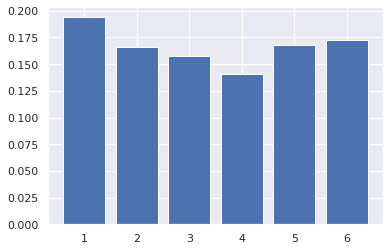

In [0]:
# 一様分布
# サイコロを1000回振ってみる
calc_steps = 1000

# 1〜6のデータの中から、1000回の抽出を実施
dice_rolls = np.random.choice(dice_data, calc_steps)

# それぞれの数字がどれくらいの割合で抽出されたか計算
prob_data = np.array([])
for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    prob_data = np.append(prob_data, len(dice_rolls[dice_rolls==i]) / calc_steps)

plt.bar(dice_data, prob_data)
plt.grid(True)

#### ベルヌーイ分布

結果が2種類しかない試行をベルヌーイ試行といいます。ベルヌーイ分布とは、1回のベルヌーイ試行において、各事象が生じる確率の分布を指したものです。
以下では、コインを8回投げて、表が出たら「0」、裏が出たら「1」とし、その結果が、[0, 0, 0, 0, 0, 1, 1, 1]であったと仮定したとき、その確率分布を示したものです。

In [0]:
# ベルヌーイ分布
# 0:head(表)、1:tail(裏)と考える
# サンプル数を8とした
prob_be_data = np.array([])
coin_data = np.array([0, 0, 0, 0, 0, 1, 1, 1])

# uniqueで一意な値を抽出（ここの場合は、0と1）
for i in np.unique(coin_data):
    p = len(coin_data[coin_data==i]) / len(coin_data)
    print(i, 'が出る確率', p)
    prob_be_data = np.append(prob_be_data, p)

0 が出る確率 0.625
1 が出る確率 0.375


グラフ化すると以下のようになります。なお、`xticks`でラベルを設定しています。

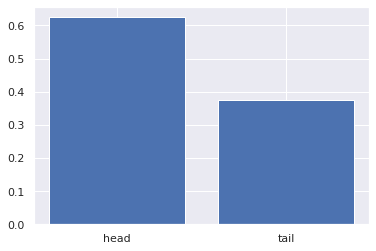

In [0]:
plt.bar([0, 1], prob_be_data, align='center')
plt.xticks([0, 1], ['head', 'tail'])
plt.grid(True)

#### Pythonで分布に基づくデータを取得する

これまで説明してきた一様分布とベルヌーイ分布の例では、実データから、その分布をグラフにする手法をとりました。しかしデータ分析するときには、特定の分布に基づいたデータ列を計算式で作りたいことがあります。たとえば、実データの分布グラフと、計算から求めた分布グラフを比較して、特定の性質に似ているかどうかを確認したり、近似させたりしたい場合などです。
そうしたときには、Numpyの各種関数を使うことで計算できます。以下、それらの関数を使った分布データを作りグラフ化することで、どのような特徴があるのかを見ていきましょう。

#### 二項分布

二項分布は、独立なベルヌーイ試行をn回繰り返したものです。pythonでは、`random.binominal`を使って計算できます。`binominal`に渡すパラメーターは先頭から順に、試行回数（`n`）、確率（`p`）、サンプル数です。`random.binominal`は`n`回の試行のうち、確率`p`で生じる事象が発生する回数を返します。

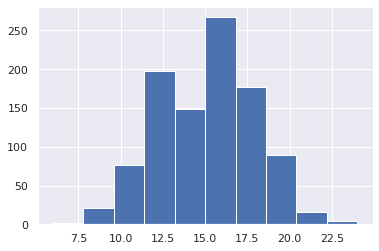

In [0]:
# 二項分布
np.random.seed(0)
x = np.random.binomial(30, 0.5, 1000)
plt.hist(x)
plt.grid(True)

#### ポアソン分布

ポアソン分布は、稀な事象が起きる確率の時、使われます。一定の時間や面積に対して一定の割合で発生する分布で、たとえば、単位面積当たりの雨粒の数や1平米当たりに生えている木の数などがポアソン分布に従います。

Numpyの`random.poisson`を使って計算できます。1つ目のパラメータは、あの区間で事象が発生すると見込まれる回数で、ここでは7を設定しています。2つ目のパラメータはサンプル数です。

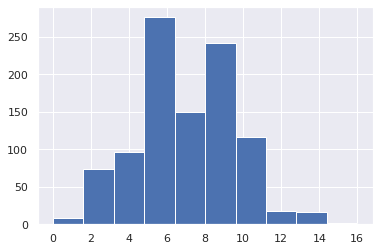

In [0]:
# ポアソン分布
x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

#### 正規分布と対数正規分布

次は、正規分布と対数正規分布です。正規分布とはガウス分布ともいわれ、代表的な連続型の確率分布です。私たちが生活する身近するなところでも、色々な現象としてみることができます。対数正規分布は$\log{x}$が正規分布に従うときの分布です。それぞれ、`np.random.normal`、`np.random.lognormal`を使うと得られます。

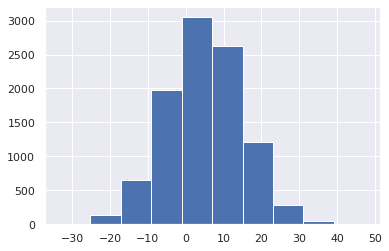

In [0]:
# 正規分布
# np.random.normal(平均、標準偏差、サンプル数)
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

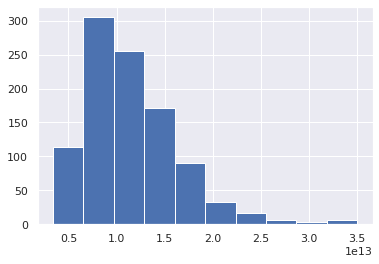

In [0]:
# 対数正規分布
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

### 6.8.3 カーネル密度関数

次にカーネル密度関数について見ていきましょう。これは、与えられたデータを使って、密度関数を推定するものです。
以前扱った、学生の欠席数データについて、分布の近似をしてみましょう。欠席数は、「`absences`」に記載されているので、このデータを使います。すなわちデータを`student_data_math`として読み込んだとしたら、`student_data_math.absences`が欠席数に相当します。

以下は、カーネル密度関数を使って、欠席数の分布を推定するものです。ただし、データの性質上、0より小さいものはありえないので、実務で使うときは注意しましょう。カーネル密度関数のグラフは、次のように、`kind='kde'`を指定すると描画できます。

`student_data_math.absences.plot(kind='kde', style='k--')`

In [0]:
# 注：ここはデータを取得していれば、実行しなくて大丈夫です。
import requests
import zipfile
from io import StringIO
import io

zip_file_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

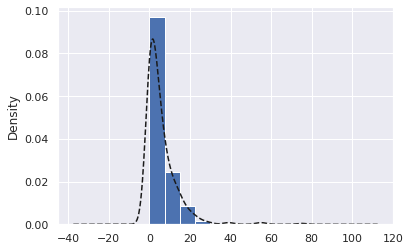

In [0]:
# データを読み込む
student_data_math = pd.read_csv('student-mat.csv', sep=';')

# カーネル密度関数
student_data_math.absences.plot(kind='kde', style='k--')

# 単純なヒストグラム、density=Trueにすることで、確率で表示
student_data_math.absences.hist(density=True)
plt.grid(True)

In [0]:
?plt.hist

上記に今回のstudent-mat.csvの`abcences`がベースになったヒストグラムが描かれています。そして、グラフの点線で絵が描かれている線が、上記で作成したカーネル密度関数で、滑らかに曲線が描かれています。これをみることで、このデータがどんな分布から生成されたのか推測ができます。

#### <練習問題 6-10>

平均0、分散1の正規分布から$n=100$の標本抽出を10000回繰り返して、標本平均$\overline{X}=\frac{1}{n}\sum^n_{i=1}X_i$の標本分布（ヒストグラム）を描いてください。

In [0]:
import numpy as np
import numpy.random as random
meanArray = np.array([ np.mean(random.normal(50, 10.0, 100)) for _ in range(10000)])

from scipy import stats as st
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(meanArray,normed=True)  # 頻度ではなく割合で表示
x = np.linspace(35, 65, 10000)
plt.plot(x, st.norm.pdf(x,50,10.0**0.5), ls='--',label=r'N(%i,%i)$' % (0,1))
plt.grid()
plt.show()

(-10, 10)

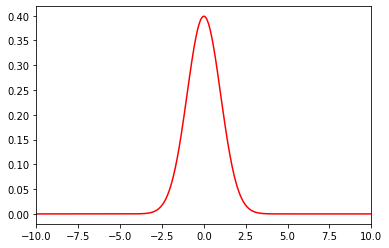

In [0]:
import numpy as np
import matplotlib.pyplot as plt
 
from scipy.stats import norm
import matplotlib.pyplot as plt
 
x = np.arange(-10,10,0.01)
#ガウス分布の確率密度関数,平均 0、標準偏差1
y = norm.pdf(x,0,1)
 
plt.plot(x,y,color='r')
plt.xlim(-10,10)

#### <練習問題 6-11>

<練習問題 6-11>と同じく、対数正規分布の場合を実装してください。

#### <練習問題 6-12>

前半部で用いたデータを使い、学生のデータの数学一期目の成績G1のヒストグラムとカーネル密度推定を描いてください。

***

## 6.9 （応用）多次元確率分布
キーワード：同時確率分布、周辺確率関数、条件付き確率関数、条件付き平均、分散共分散行列、多次元正規分布

これまでは、確率変数が1つのみの場合を扱ってきました。次に、確率変数が2つかそれ以上にある場合の確率分布を考えていきましょう。なお、ここは少し応用の範囲になり、難しい場合は、読み流しても後の章に大きな影響はないようにしています。練習問題はありません。

### 6.9.1 同時確率関数と周辺確率関数
$X$が{$x_0, x_1, ...$}、$Y$が{$y_0, y_1, ...$}上で値をとる離散型の確率変数を考えます。$X=x_i$と$Y=y_j$である確率を以下のように書くとします。

\begin{eqnarray}
P(X=x_i, Y=y_j) = p_{X, Y}(x_i, y_j)
\end{eqnarray}

これを**同時確率関数**といい、また、

\begin{eqnarray}
p_{X}(x_i) = \sum^\infty_{j=0}p_{X, Y}(x_i, y_j)
\end{eqnarray}

を$X$の**周辺確率関数**といい、$Y$についても同様に定義されます。

### 6.9.2 条件付き確率関数と条件付き期待値
1変数の時に定義した条件付き確率について、2変数のケースを考えてみましょう。$X=x_i$を与えた時の$Y=y_j$の**条件付き確率関数**を以下のように定義します。

\begin{eqnarray}
p_{Y|X}(y_j|x_i) = P(Y=y_j|X=x_i) =  \frac{p_{X, Y}(x_i, y_j)}{p_X(x_i)}
\end{eqnarray}


また、この条件付き確率関数に関して、期待値をとったものが条件付き期待値であり、$X=x_i$を与えた時の$Y$の**条件付き期待値（条件付き平均）**は

\begin{eqnarray}
E[Y|X=x_i] = \sum^\infty_{j=1}y_jp_{Y|X}(y_j|x_i) = \frac{\sum^\infty_{j=1}y_jp_{X, Y}(x_i, y_j)}{p_X(x_i)}
\end{eqnarray}

のように定義されます。

### 6.9.3 独立の定義と連続分布
2変数における独立の定義は、すべての$x_i$と$y_j$に関して、以下が成り立つ時に、独立であるとします。

\begin{eqnarray}
p_{X, Y}(x_i, y_j) = p_{X}(x_i) p_{Y}(y_j) 
\end{eqnarray}

連続分布についても、同時確率密度関数、周辺確率密度関数、条件付き確率密度関数、独立など定義でき、さらに3つ以上の確率変数の分布についても定義できます。さらに、多変量正規分布やその中で使われる分散共分散行列などもありますが、これらの概念については、参考文献等を使い、勉強してみてください。

#### 2次元の正規分布をグラフで表示する

参考ですが、この多次元の同時確率密度関数をイメージするために、以下で2次元正規分布を表示させてみましょう。

以下は必要なライブラリの読み込みをします。

In [0]:
# 必要なライブラリの読み込み
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

In [0]:
# データの設定
x, y = np.mgrid[10:100:2, 10:100:2]

pos = np.empty(x.shape + (2, ))

pos[:, :, 0] = x 
pos[:, :, 1] = y 

上の$x$と$y$のデータは、10から100まで、2つずつ数を作成して、`pos`としてまとめています（次に発生させる多次元の正規分布を可視化するために、xとyで細かくデータを刻んでいるだけで、区切りの数字等には特に意味はありません）。

次は、2次元の正規分布に従うデータを発生させています。`multivariate_normal`には、それぞれの平均と分散共分散行列を設定します。

In [0]:
# 多次元正規分布
# それぞれの変数の平均と分散共分散行列を設定
# 以下の例では、xとyの平均がそれぞれ50と50、[[100, 0], [0, 100]]がxとyの共分散行列になります
rv = multivariate_normal([50, 50], [[100, 0], [0, 100]])

# 確率密度関数
z = rv.pdf(pos)

上記をグラフ化すると以下のようになります。なお、3次元グラフのためAxes3Dの`plot_wireframe`を使っています。

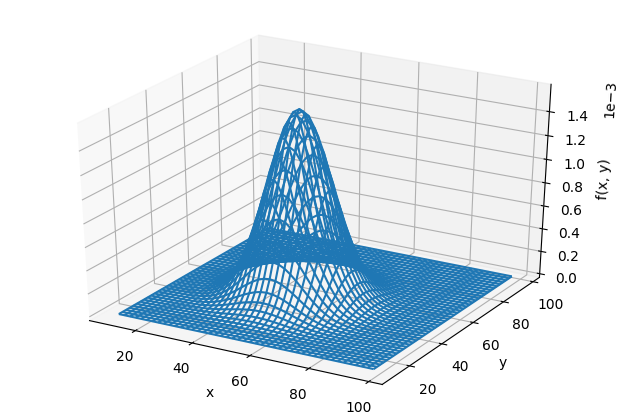

In [0]:
fig = plt.figure(dpi=100)

ax = Axes3D(fig)
ax.plot_wireframe(x, y, z)

# x,y,zラベルの設定など
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

# z軸の表示目盛り単位を変更、sciが指数表示、axisで軸を指定、scilimits=(n,m)はnからmの外にあるものは指数表記
# scilimits=(0,0)はすべて指数表記にするという意味
ax.ticklabel_format(style='sci', axis='z', scilimits=(0, 0))

***

## 6.10 推計統計学
キーワード：標本、母集団、抽出、推測統計学、標本のサイズ、大数の法則、中心極限定理、t分布、カイ二乗分布、F分布

これまでは、実際に得られたデータについての平均や標準偏差等を求めてきました。この手に入れたデータのことを**標本**といいます。しかし、本来はその背後にあるもっと大きなデータ・全体の性質を知ることが重要です。この標本をベースに統計的な分析を実施して、推測しようとする対象全体を**母集団**といい、これが**推測統計学**です。また、標本は母集団から取り出されたもので、これを**抽出**といいます。実際に、観測されたデータ$x_1, , , x_n$は、$n$個の確率変数$X_1, , , X_n$の実現値であり、このnを標本の**サイズ（大きさ）**といいます。また、母集団の平均（母平均）や分散（母分散）といった、母集団の特性を表す定数のことを**母数**と言います。

![dd](http://www.toukei.metro.tokyo.jp/manabou/img/tyuu/sirou/tokutyou/m-1.jpg)

参照URL：http://www.toukei.metro.tokyo.jp/manabou/img/tyuu/sirou/tokutyou/m-1.jpg

### 6.10.1 大数の法則

次は、確率論で重要な**大数の法則**について学びます。ここで再び先ほどのサイコロを投げて出目を調べる例を考えましょう。

サイコロをどんどん振っていき、それまでの平均値の軌跡をたどります。具体的には、1回目投げた時の目が1の時は平均1、次に投げた時に3が出た場合は、$(1＋3)/2$で平均は2という具合に、続けて平均値を計算していきます。大数の法則とは、この試行を繰り返していく（試行回数Nを大きくする）と、その平均は、期待値（3.5）に近づいていくという法則です。

以下では、サイコロを投げる回数$N$を1000とし、それを4回実施します（4パス）。以下の結果グラフは、どのパスも$N$が大きくなればなるほど、3.5に近づいてるのがわかります。

In [0]:
# 大数の法則

# 計算回数
calc_times =1000
# サイコロ
sample_array = np.array([1, 2, 3, 4, 5, 6])
number_cnt = np.arange(1, calc_times + 1)

# 4つのパスを生成
for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p / number_cnt)

### 6.10.2 中心極限定理

次は、中心極限定理です。こちらは、サイコロを投げる回数$N$が増えれば増えるほど、標本平均が正規分布の形になっていく法則です。

In [0]:
# 中心極限定理
def function_central_theory(N):
    
    sample_array = np.array([1, 2, 3, 4, 5, 6])
    numaber_cnt = np.arange(1, N + 1) * 1.0
 
    mean_array = np.array([])
 
    for i in range(1000):   
        cum_variables = np.random.choice(sample_array, N).cumsum()*1.0
        mean_array = np.append(mean_array, cum_variables[N-1] / N)
 
    plt.hist(mean_array)

それではこの関数を使って、$N$をどんどん増やし、そのヒストグラフを見てみましょう。

In [0]:
# N=3
function_central_theory(3)

In [0]:
# N=6
function_central_theory(6)

$N$をどんどん増やしていくと、正規分布の形になっているのがわかります。

In [0]:
# N= 10^3
function_central_theory(10**3)

### 6.10.3 標本分布

次に、代表的な標本分布について学びましょう。

##### カイ2乗分布

1つ目は**カイ2乗分布**です。$m$個の確率変数$Z_1, ...Z_m$が互いに独立に分布し、各$Z_i$が標準正規分布（平均0，分散1の正規分布）
に従うとします。この時、以下の確率変数の二乗和である

\begin{eqnarray}
W = \sum^m_{i=1}Z^{2}_{i}
\end{eqnarray}

は、自由度mのカイ2乗分布に従うと言います。以下が、その分布に従う乱数のヒストグラムです。なお、zipは1章で紹介した関数ですが、複数の配列から、タプルの配列を作るために使います。ここでは[2, 10, 60]という配列と["b", "g", "r"]という配列から、[(2, "b"), (10, "g"), (60, "r")]というタプルの配列を作ります。

In [0]:
# カイ2乗分布
# 自由度2, 10, 60に従うカイ二乗分布が生成する乱数のヒストグラム
for df, c in zip([2, 10, 60], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)

#### ステューデントt分布
次は、ステューデントの**t分布**です。$Z$と$W$を独立な確率変数として、それぞれ標準正規分布、自由度mのカイ2乗分布に従うとした時、

\begin{eqnarray}
T = \frac{Z}{\sqrt{\frac{W}{m}}}
\end{eqnarray}

とおいた時、$T$は自由度$m$のステューデントのt分布に従うといいます。以下はt分布のサンプル図です。

In [0]:
# t分布
x = np.random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

#### F分布
最後に、**F分布**についても紹介します。$W_1$と$W_2$を独立な確率変数、それぞれ自由度$m_1, m_2$のカイ2乗分布に従うとして、

\begin{eqnarray}
F = \frac{\frac{W_1}{m_2}}{\frac{W_2}{m_2}}
\end{eqnarray}

とおいた時、$F$は自由度$(m_1, m_2)$のスネディッカーのF分布に従うといいます。以下は、F分布のサンプル図です。

In [0]:
# F 分布
for df, c in zip([ (6, 7), (10, 10), (20, 25)], 'bgr'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)

以上で代表的な分布についての紹介は終わります。他にも、いろいろな分布がありますので、必要が生じた場合にその都度調べてみましょう。

#### <練習問題 6-13>

自由度5、25、50のカイ二乗分布からの乱数をそれぞれ1000個発生させて、ヒストグラムを書いてください。

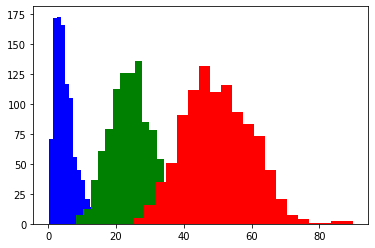

In [0]:
# カイ2乗分布
# 自由度2, 10, 60に従うカイ二乗分布が生成する乱数のヒストグラム
for df, c in zip([5, 25, 50], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)

#### <練習問題 6-14>

自由度100のt分布からの乱数を1000個発生させて、ヒストグラムを書いてください。

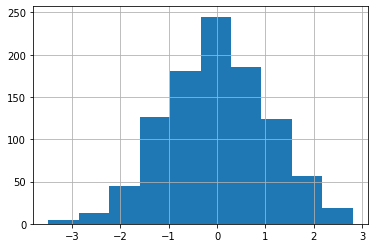

In [0]:
# t分布
x = np.random.standard_t(100, 1000)
plt.hist(x)
plt.grid(True)

#### <練習問題 6-15>

自由度(10, 30)、(20, 25)のF分布からの乱数をそれぞれ1000個発生させて、ヒストグラムを書いてください。

In [0]:
# F 分布
for df, c in zip([ (6, 7), (10, 10), (20, 25)], 'bgr'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)

***

## 6.11 統計的推定

キーワード：推定量、点推定、不偏性、不偏推定量、一致性、区間推定、信頼区間、信頼係数、最尤法、尤度、尤度関数、ベイズ法

ここでは**推定**について学んでいきます。

### 6.11.1 推定量と点推定
母集団の確率分布、平均、分散の推測をする時、母集団から標本を抽出し、標本の平均や分散を使って推定します。ここで、大きさnの無作為標本{$X_1, ..., X_n$}をもとに、母平均$\mu$を求める（推定する）方法を考えるとします。まず、標本平均$\overline{X}$は、

\begin{eqnarray}
\overline{X}=\frac{1}{n}\sum^n_{i=1}X_i
\end{eqnarray}

となります。これを一般化すると、以下のように確率変数の関数として記述でき、この式を**推定量**と言います。これは母平均や母分散などの母数を推定するための式です。標本に基づいて、母数を1点のパラメータ値（$\theta$）として言い当てることを**点推定**といいます。

\begin{eqnarray}
\overline{X}=T(X_1, ..., X_n)
\end{eqnarray}

### 6.11.2 不偏性と一致性

ただし、関数としてなんでも良いというわけではなく、パラメータをより正確に推定できることが望ましいです。そのための判断基準として、**不偏性**と**一致性**という性質があります。

推定量の期待値が母数$\theta$と一致するとき、推定量に**不偏性**があるといい、以下のように表現できます。この不偏性を持つ推定量を**不偏推定量**といいます。

\begin{eqnarray}
E[T(X_1, ..., X_n)]=\theta
\end{eqnarray}

一致性とは、$\theta$の推定量$E[T(X_1, ..., X_n)]$が観測個数nが大きくなるにつれて、$\theta$に近づいていくという性質であり、任意の$\epsilon>0$に関して、以下のように表現できます。このとき、$T(X_1, ..., X_n)$を一致推定量といいます。

\begin{eqnarray}
\displaystyle \lim_{n \to \infty} P[|T(X_1, ..., X_n)- \theta |\ge \epsilon]=0
\end{eqnarray}

### 6.11.3 区間推定

点推定では母数を1点で求めましたが、区間推定はある程度の区間を持たせて、母数を推定するものです。まず、標本$X_1, ..., X_n$があり、これは平均が$\mu$、分散が1の正規分布$N$($\mu$,1)から無作為抽出されているとします。この標本から母平均$\mu$を推定する場合を考えてみましょう。この場合、標本平均$\overline{X}$は、平均が$\mu$、分散が$\frac{1}{n}$の正規分布$N(\mu,\frac{1}{n})$に従うため、正規分布の両側$\alpha$点を$z_{\alpha /2}$として、

\begin{eqnarray}
P(-z_{\alpha /2} \le \sqrt{\mathstrut n} (\overline{X} - \mu ) \le z_{\alpha /2} )=1-\alpha
\end{eqnarray}

が成り立ちます。この式を書き換えると、

\begin{eqnarray}
P(\overline{X} - \frac{z_{\alpha /2}}{\sqrt{n}} \le \mu \le \overline{X} + \frac{z_{\alpha /2}}{\sqrt{n}})=1-\alpha
\end{eqnarray}

と書くことができ、区間$[\overline{X} - \frac{z_{\alpha /2}}{\sqrt{n}} , \overline{X} + \frac{z_{\alpha /2}}{\sqrt{n}}]$ を$\mu$の推定のための区間として用いることができます。このとき、区間$[\overline{X} - \frac{z_{\alpha /2}}{\sqrt{n}} , \overline{X} + \frac{z_{\alpha /2}}{\sqrt{n}}]$を**信頼区間**と言います。信頼区間に推定したい母数（ここでは母平均）が入っている確率を**信頼係数**といい、$1-\alpha$で表現できます。信頼区間の一般的な定義は以下のようになります。

$X_1, ..., X_n$を母集団分布$f(x;\theta)$からの無作為標本として、$\theta$は1次元の母数とします。${\bf X}=(X_1, ..., X_n)$とおくと、2つの統計量$L({\bf X}), U({\bf X})$がすべての$\theta$について以下を満たす時、区間$[L({\bf X}), U({\bf X})]$を**信頼係数**$1-\alpha$の**信頼区間**といいます。

\begin{eqnarray}
P(L({\bf X})\le \theta \le U({\bf X})) \ge 1-\alpha
\end{eqnarray}

### 6.11.4 推定量を求める

推定量を求めるにはいつかの手法があります。ここでは、最尤法とベイズ法について、簡単に解説します（他にモーメント法などもあるので、調べてみてください）。少し応用的な内容になりますので、読み流しても大丈夫です。

#### 最尤法

同時確率関数を学んだ時に、母数を与えられて、観測値が生じる確率を求めましたが、逆に、観測値を与えられた時に、確率関数を母数の関数とみなしたものが**尤度関数**です。最尤法は、尤度関数を最大化する母数を母数の推定値とする方法です。

今、確率関数$f(x;\theta)$を与えられているとします。$x$は変数、$\theta$は定数を意味しています。

母集団からの無作為標本$X_1, ..., X_n$をとり、${\bf X}=(X_1, ..., X_n)$とします。この${\bf X}$の実現値${\bf x}=(x_1, ..., x_n)$における同時確率関数を$\theta$の関数とみなして、以下のように尤度関数を定義します。

\begin{eqnarray}
L(\theta;{\bf x})=f(x_1;\theta) \cdot...\cdot f(x_n;\theta)
\end{eqnarray}

尤度関数は、積の形をしており、対数変換によって和に直した方が計算しやすいため、以下のように**対数尤度関数**に直します。

\begin{eqnarray}
\log L(\theta;{\bf x})=\sum^n_{i=1} \log f(x_i;\theta)
\end{eqnarray}

上記の最大値を求めるために、微分して0になる解$\theta$を求めます。以下の方程式を**尤度方程式**、この解$\theta$を**最尤推定量**といいます。これが最尤推定法による推定値の求め方です。

\begin{eqnarray}
\frac{d}{d\theta}{\log L(\theta,{\bf x})}= 0
\end{eqnarray}

#### ベイズ法

今までは、母数$\theta$に対して何も情報がなく、頻度論的なアプローチで推定をしていましたが、この$\theta$について、事前分布を仮定して、ベイズの定理を使い、事後分布に更新していくことをベイズ法といいます。

ここで、標本から得られる尤度関数を$p(x|\theta)$として、母数$\theta$が事前確率$\pi(\theta)$に従うと仮定すると、ベイズの定理により、事後分布を以下のように求めることができます。

\begin{eqnarray}
\pi(\theta|x) = \frac{p(x|\theta)\pi(\theta)}{\int p(x|\theta)\pi(\theta) d\theta}
\end{eqnarray}

#### <練習問題 6-16>
平均$\mu$で分散$\sigma^2$の正規母集団から大きさnの標本から作った標本平均は、母平均であることが望ましく、この不偏性を示してください（手計算で大丈夫です）。

#### <練習問題 6-17>
あるコインを5回投げたとして、裏、表、裏、表、表と出ました。このコインの表が出る確率を$\theta$として、これを推定してください（手計算で大丈夫です）。

#### <練習問題 6-18>
母集団が以下の指数分布に従っている時に、そこから大きさnの標本${X_1, X_2, ...X_n}$を得たとして、母数${\lambda}$を最尤推定してください（手計算で大丈夫です）。

\begin{eqnarray}
f(x|\lambda) = \lambda \mathrm{e}^{-\lambda x}
\end{eqnarray}

***

## 6.12 統計的検定
キーワード：帰無仮説、対立仮説、有意、棄却、有意水準、第1種の過誤、第2種の過誤、検出力

さて、長く数式の説明が続いたので、ここで再び、本章前半部で扱った「学生のデータ」に戻りましょう。練習問題でもやりましたが、まずは、数学とポルトガル語の成績の平均を計算してみます。次のようになります。

ここではstudent-mat.csvという数学成績データとstudent-por.csvというポルトガル語成績データを読み込み、それをマージしています。pandas.merge（以下ではpd.merge）のパラメータ「`on`」で指定しているのはマージする項目、「`suffixes`」はマージ後の列の末尾に付ける接辞尾です。

In [0]:
# 数学のデータを読み込む
student_data_math = pd.read_csv('student-mat.csv', sep=';')

# ポルトガルのデータを読み込む
student_data_por = pd.read_csv('student-por.csv', sep=';')

# マージする
student_data_merge = pd.merge(student_data_math
                              , student_data_por
                              , on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu'
                                      , 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet']
                              , suffixes=('_math', '_por'))

print('G1数学の成績平均：', student_data_merge.G1_math.mean())
print('G1ポルトガル語の成績平均：', student_data_merge.G1_por.mean())

G1数学の成績平均： 10.861256544502618
G1ポルトガル語の成績平均： 12.112565445026178


### 6.12.1 検定
数字を見ていると、若干ではありますが、数学の方が悪いように見えます。しかし、果たしてこれは本当に差があると言ってもよいのでしょうか？　これを考えていくのが検定というアプローチです。仮説として、母集団において成績の平均に差がないとしましょう。数学の成績の母平均を$\mu_{math}$、ポルトガル語の成績の母平均を$\mu_{por}$とすると、以下の式が成り立つとします。

\begin{eqnarray}
\mu_{math} = \mu_{por}
\end{eqnarray}

検定において、正しいか検討する仮説のことを**帰無仮説**といい、$H_{0}$とします。一方、帰無仮説の否定は、2つの間に差があるという仮説です。つまり、以下の式が成り立つことを意味します。

\begin{eqnarray}
\mu_{math} \neq \mu_{por}
\end{eqnarray}

これを**対立仮説**といい、$H_{1}$と表します。次に、先ほどの$H_{0}$を正しいとした場合に、統計的なアプローチを取り、それが起こることはありえない（たとえば、$\mu_{math} = \mu_{por}$が起こる確率が5%未満になる）ということが言えたとします。この時、この$H_{0}$は**棄却**されるといい、対立仮説が採択され、よって差があることがいえることになります。


また、先ほど5%未満としましたが、検定において帰無仮説を棄却する水準のことを**有意水準**といい、それを5%に設定したことになります。また、有意水準に満たないことを、統計的な差がある（**有意**である）といいます。有意水準は**α**で表され、α=5%やα=1%がよく使われます。

また、**p-value**（**p値**）とは、偶然、実際に反した数値が統計量として計算されてしまう確率です。$H_{0}$が正しい場合に、p値が低いほど、ありえないことが起きた（$H_{0}$が正しくないという統計量が計算された）ということになります。

それでは、これらの概念を使って、p値を計算してみましょう。 p値を計算するには、`stats.ttest_rel`を使います。

In [0]:
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print( 'p値 = ', p)

p値 =  1.653655521710079e-16


有意水準を1%で設定すると、帰無仮説が棄却され、差があると結論づけることができます。

### 6.12.2 第1種の過誤と第2種の過誤

ここでは、有意水準1%だと帰無仮説が棄却されましたが、もしかすると帰無仮説が正しかったということもありえます。このように、帰無仮説が正しいにもかかわらず、棄却してしまうことを**第1種の過誤**といい、その確率は通常**$α$**で表します。別名、あわてものの誤りとも言われます。一方、この帰無仮説が誤っているにもかかわらず受容してしまうことを、**第2種の過誤**といい、その確率を**$β$**で表します。この第2種の過誤は誤っているのに見過ごしているので、ぼんやりものの誤りともいわれます。

この$β$の補数$1-β$は**検出力**と呼ばれ、帰無仮説が誤っているときに正しく棄却できる確率を表します。裁判で例えると、実際には有罪である犯罪者が無罪の判決を受けるのは第1種の過誤、実際には無罪の人が有罪の判決を受けるのは第2種の過誤に該当します。以下の図が参考になります。

![error](https://user-images.githubusercontent.com/423158/38920393-22e1e66e-432e-11e8-9bc2-4356f60b9732.png)

一般的に$1-β$は0.8程度ほしいといわれています。しかし、$α$と$β$は片方を小さくすると、もう片方は大きくなる関係にあります。また、$β$は重要な量ですが、値を計算するにはサンプルサイズや効果量が必要になるため、ここでは概念の紹介に留めておきます。


### 6.12.3 ビッグデータに対する検定の注意
さまざまな分野で使用されている検定ですが、注意点があります。実は検定はビッグデータの解析（特に決まった厳密な定義はありませんが、サンプルサイズが数百万、数千万以上ある場合を想定しています）には向いていないのです。まず第一に、標本と母集団の統計量が互いに厳密に等しいことは、実世界ではほぼあり得ません。

サンプルサイズを大きくすると、それにともなって検出力$1-β$が大きくなり、実務的には等しいと考えていいような微妙な差であってもp値が小さくなり、帰無仮説が棄却されてしまいます。つまり、ビッグデータに対して検定を行うと大抵の場合、高度に有意な（p値がかなり小さい）結果になってしまうのです。

また、検定で高度に有意な結果になったとしても、2つの母数は大きく異なるという事は結論付けられません。2つの値がどの程度異なるかに関しては検定からはわからないのです。どの程度の差があるかを知りたい場合には前節で用いた信頼区間を用いるのが効果的です。

以上で、検定までの単元は終了です。この単元は幅が広く、この講座では扱いきれない部分がありますが、もし今までに統計や確率について学ぶ機会がなかった場合は、はじめに紹介した参考文献等を見ながらぜひ一通り勉強してみてください。また、今まで扱ったライブラリの関数には色々なオプションがありますので、興味のある方は調べてみてください。

#### <練習問題 6-19>

前半部分で使用したデータで、数学とポルトガル語の成績のG2のそれぞれの平均について、差があると言えるでしょうか。また、`G3`はどうでしょうか。

***

## 6.13 総合問題

### ■総合問題6-3 検定

「6.12 統計的検定」で使用したデータ（`student_data_merge`）を使って、以下の問いに答えてください。

（1）それぞれの欠席数（`absences`）については、差があるといえるでしょうか。


（2）それぞれの勉強時間（`studytime`）についてはどうでしょうか。